In [1]:
import pandas as pd

### Cargamos las metricas y coeficientes de los modelos

In [2]:
lineal_coefs_df = pd.read_csv(
    '../../datamarts/coeficientes_por_categoria_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

nonlineal_importances_df = pd.read_csv(
    '../../datamarts/impotancia_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_lineal_df = pd.read_csv(
    '../../datamarts/metricas_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_nonlineal_df = pd.read_csv(
    '../../datamarts/r2_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

## Comparativa del modelo lineal y no lineal

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
def compare_coefficients_and_importances_with_r2(
    linear_coefs_df,
    nonlinear_importances_df,
    linear_metrics_df,
    nonlinear_metrics_df,
    top_n=10
):
    results = []

    # Ensure index
    if 'Variable' in linear_coefs_df.columns:
        linear_coefs_df = linear_coefs_df.set_index('Variable')

    targets = nonlinear_importances_df['Target'].unique()

    for target in targets:
        if target not in linear_coefs_df.columns:
            continue

        # Coefficients
        coefs = linear_coefs_df[target].dropna()
        top_coefs = coefs.abs().sort_values(ascending=False).head(top_n)
        top_coef_vars = top_coefs.index
        top_coef_values = coefs[top_coef_vars].values  # keep original signs

        # Importances
        imp_target = nonlinear_importances_df[nonlinear_importances_df['Target'] == target]
        top_importances = imp_target.sort_values(by='Importance', ascending=False).head(top_n)
        top_imp_vars = top_importances['Variable']

        # R²
        r2_linear_val = linear_metrics_df.loc[linear_metrics_df['Gasto'] == target, 'R2']
        r2_linear_str = f"{r2_linear_val.values[0]:.3f}" if not r2_linear_val.empty else "N/A"

        r2_nonlinear_val = nonlinear_metrics_df.loc[nonlinear_metrics_df['Target'] == target, 'R2']
        r2_nonlinear_str = f"{r2_nonlinear_val.values[0]:.3f}" if not r2_nonlinear_val.empty else "N/A"

        # Plot
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Colors for coefficients: darkred if positive, darkblue if negative
        coef_colors = ['darkred' if v > 0 else 'darkblue' for v in top_coef_values]

        axs[0].barh(
            top_coef_vars,
            top_coefs.values,
            color=coef_colors
        )
        axs[0].set_title(f'|Coef| - {target}\nR² linear = {r2_linear_str}')
        axs[0].invert_yaxis()
        axs[0].set_xlabel('Absolute Coefficient Value')

        # Colors for importances: all black
        imp_colors = ['black'] * len(top_imp_vars)

        axs[1].barh(
            top_imp_vars,
            top_importances['Importance'].values,
            color=imp_colors
        )
        axs[1].set_title(f'Importance - {target}\nR² nonlinear = {r2_nonlinear_str}')
        axs[1].invert_yaxis()
        axs[1].set_xlabel('Model Importance')

        plt.suptitle(f'Comparison: Coefficients vs Importances - {target}', fontsize=14)
        plt.tight_layout()
        results.append(fig)

    return results


C:\Users\rauul\AppData\Local\Temp\ipykernel_28340\1802690973.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(15, 6))


[<Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 

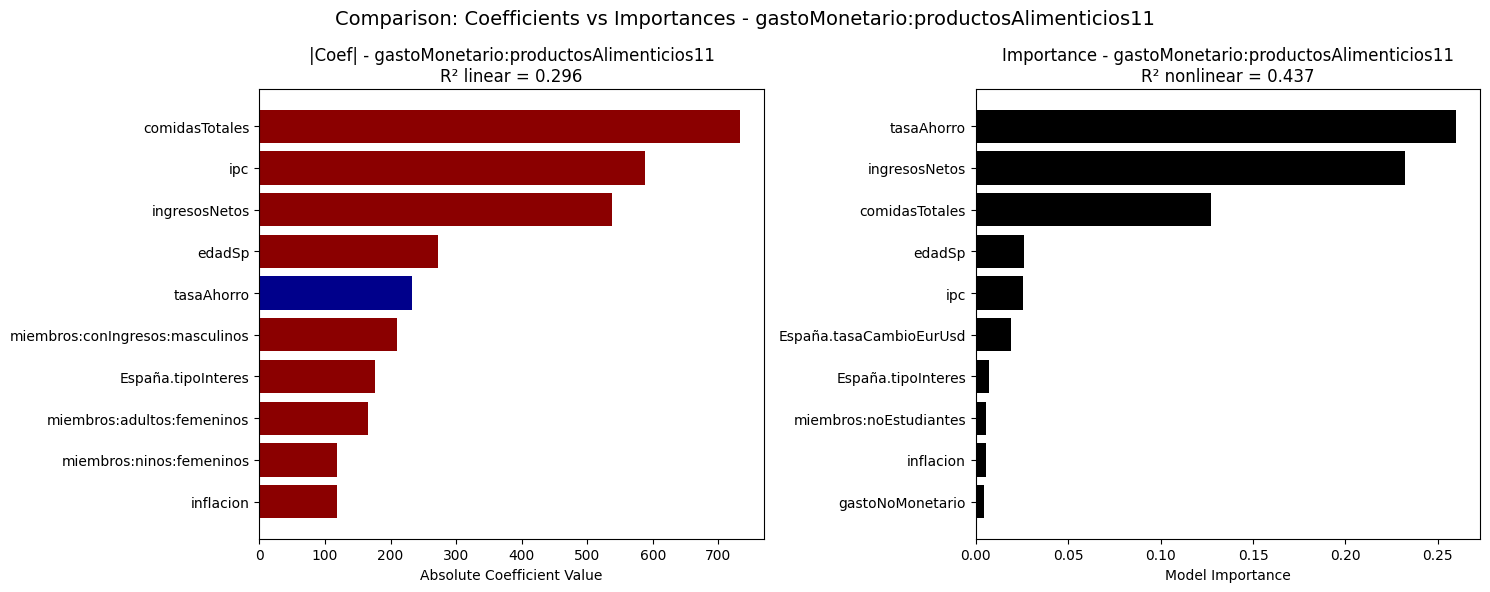

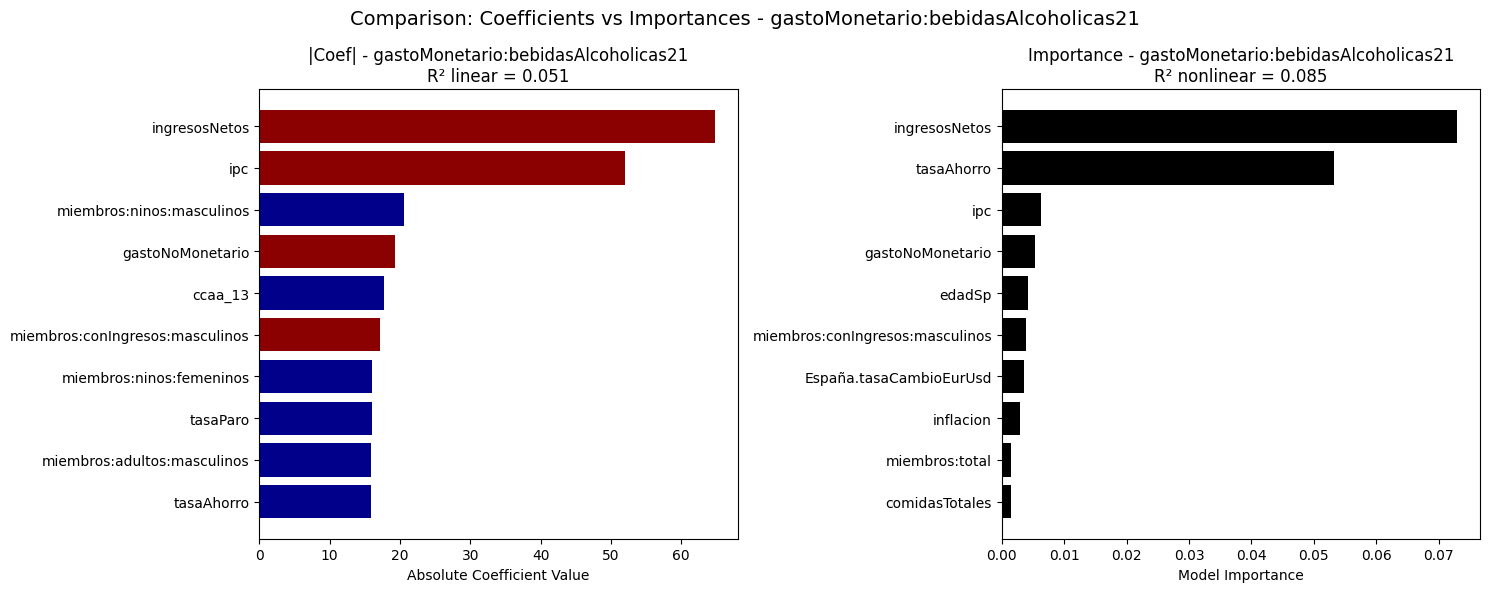

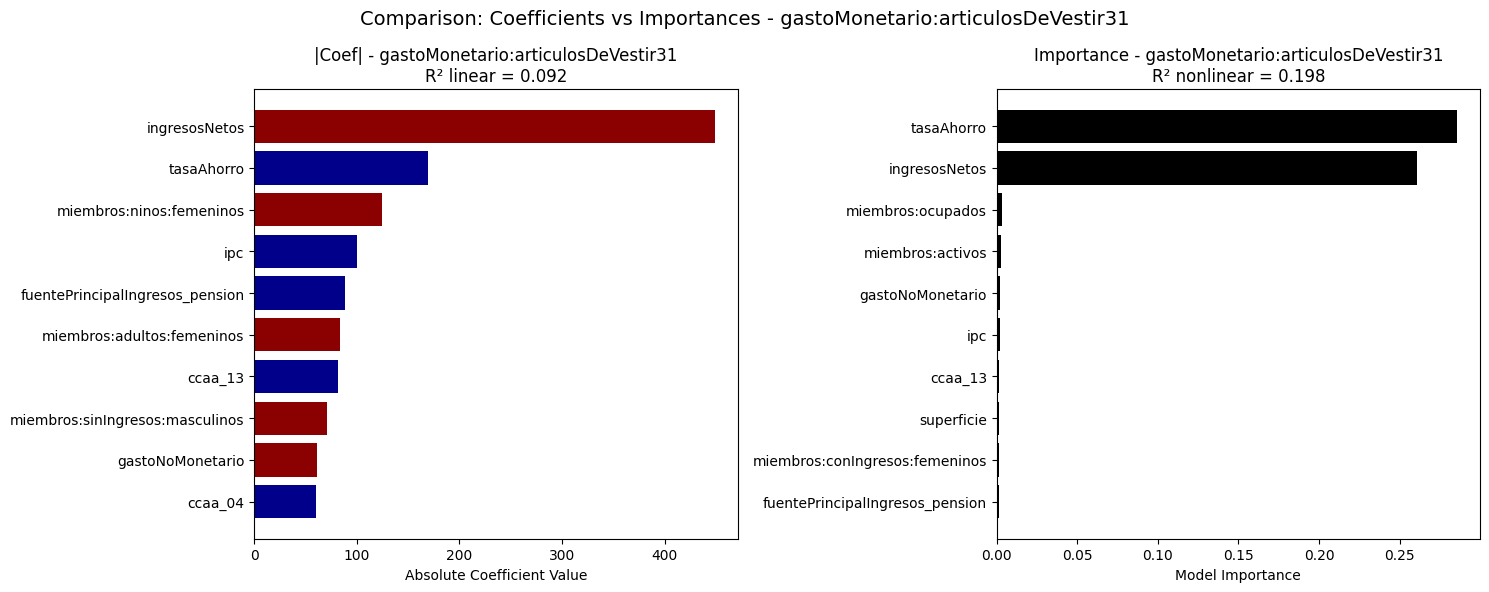

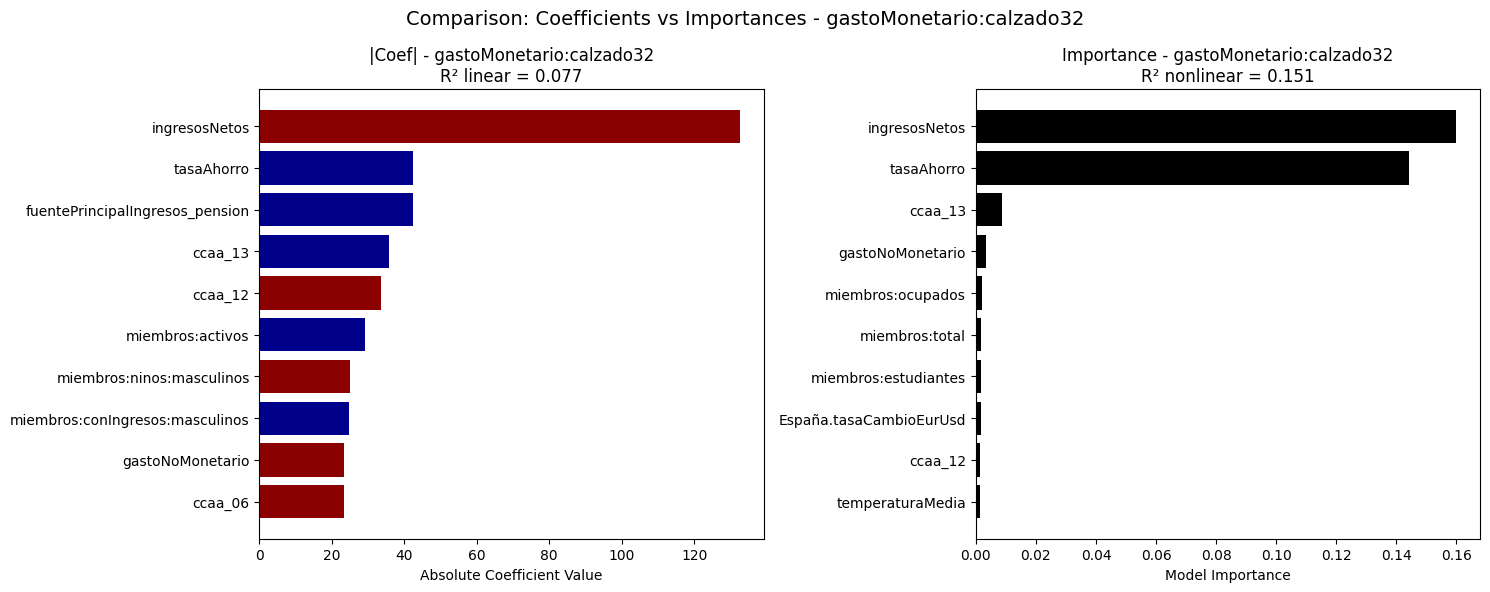

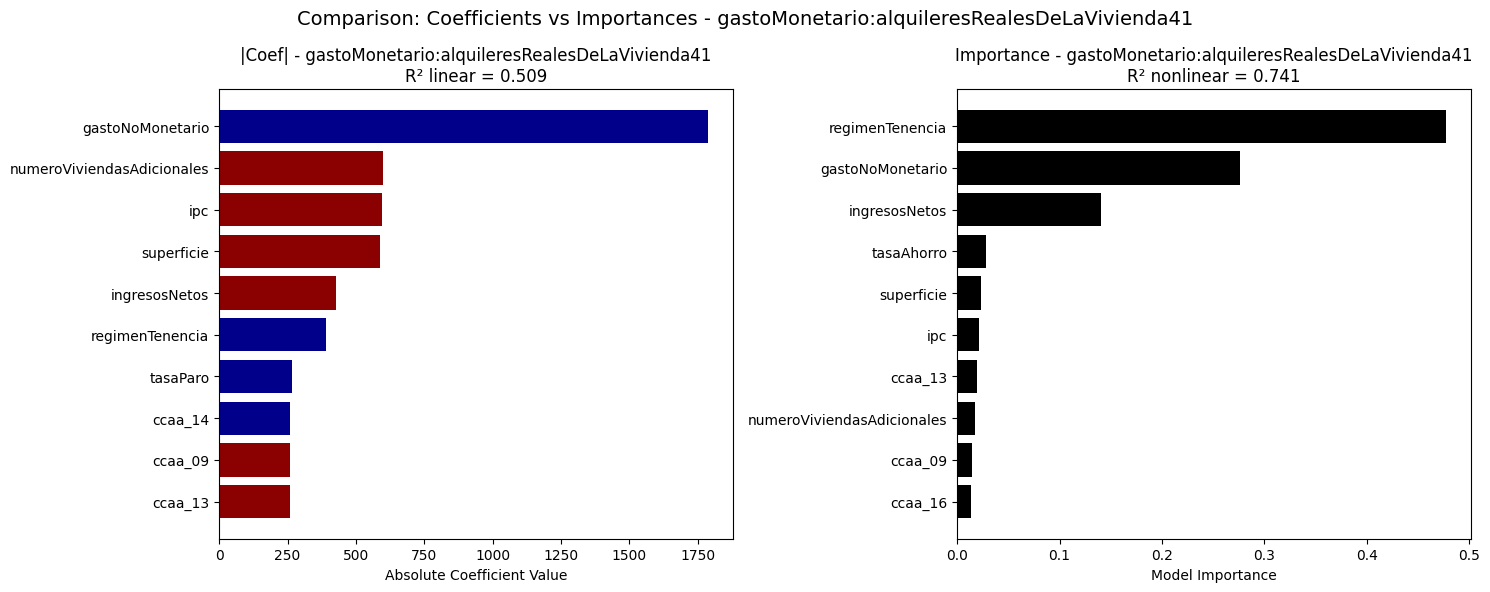

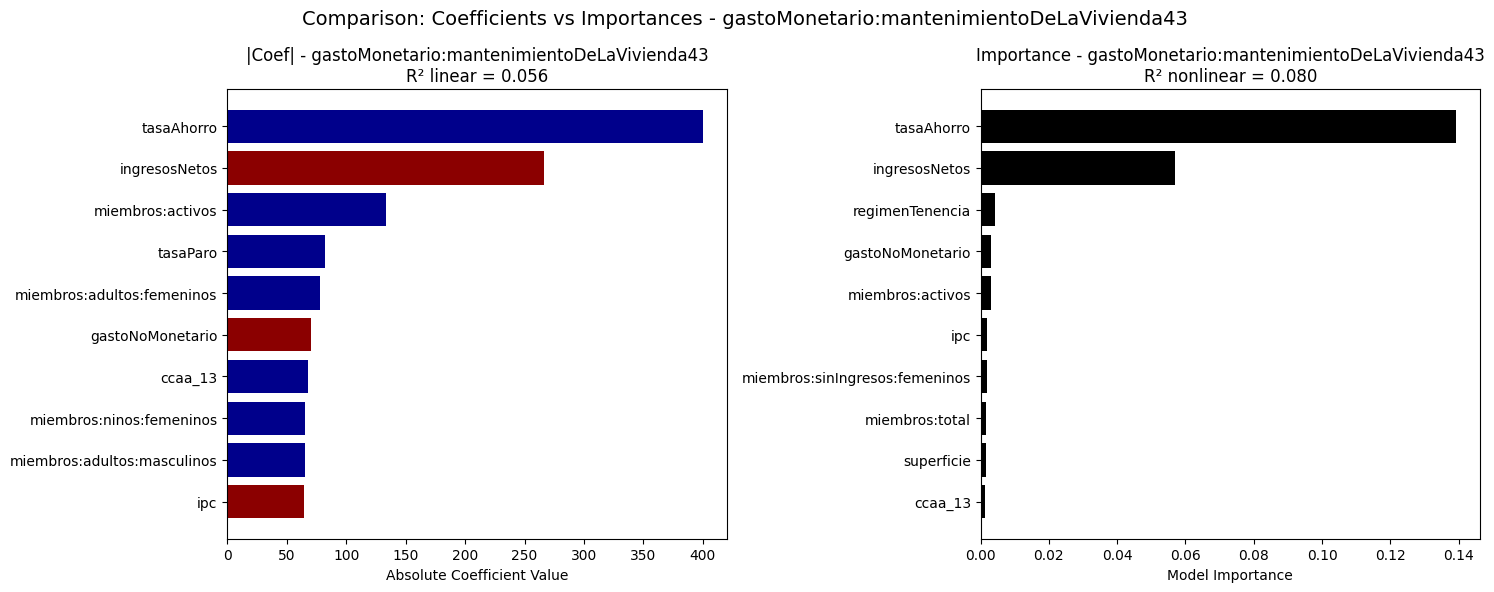

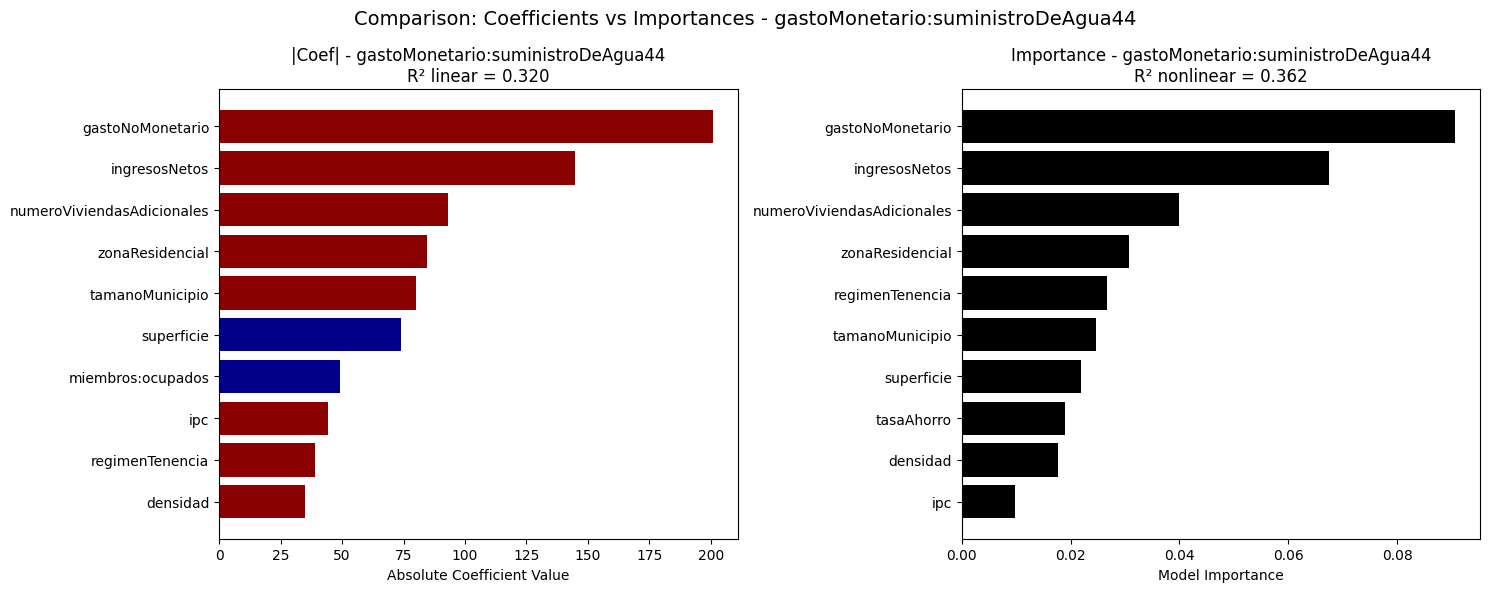

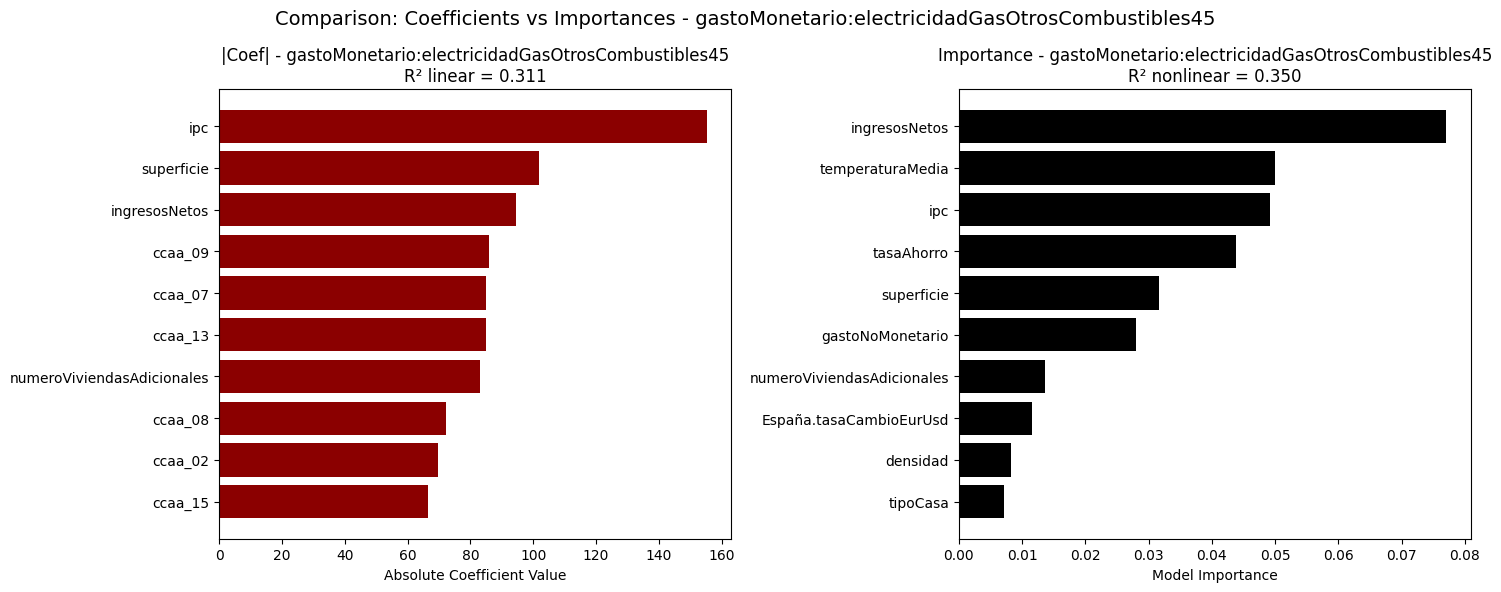

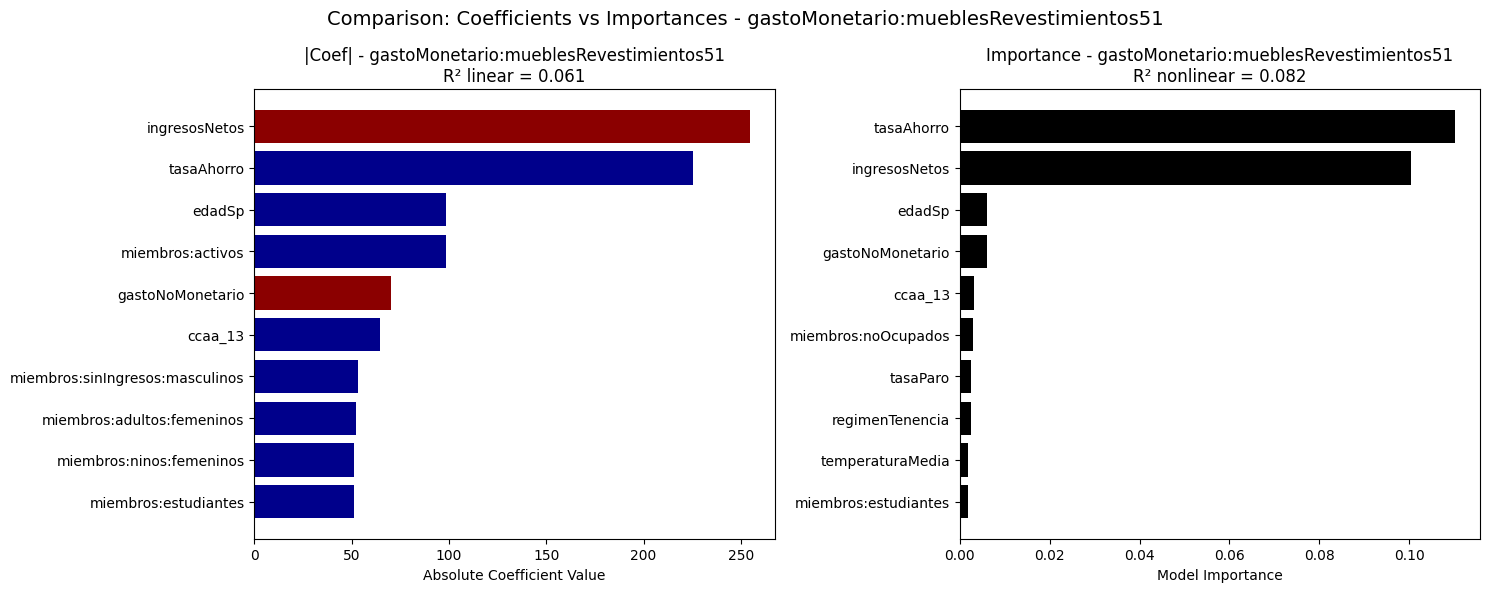

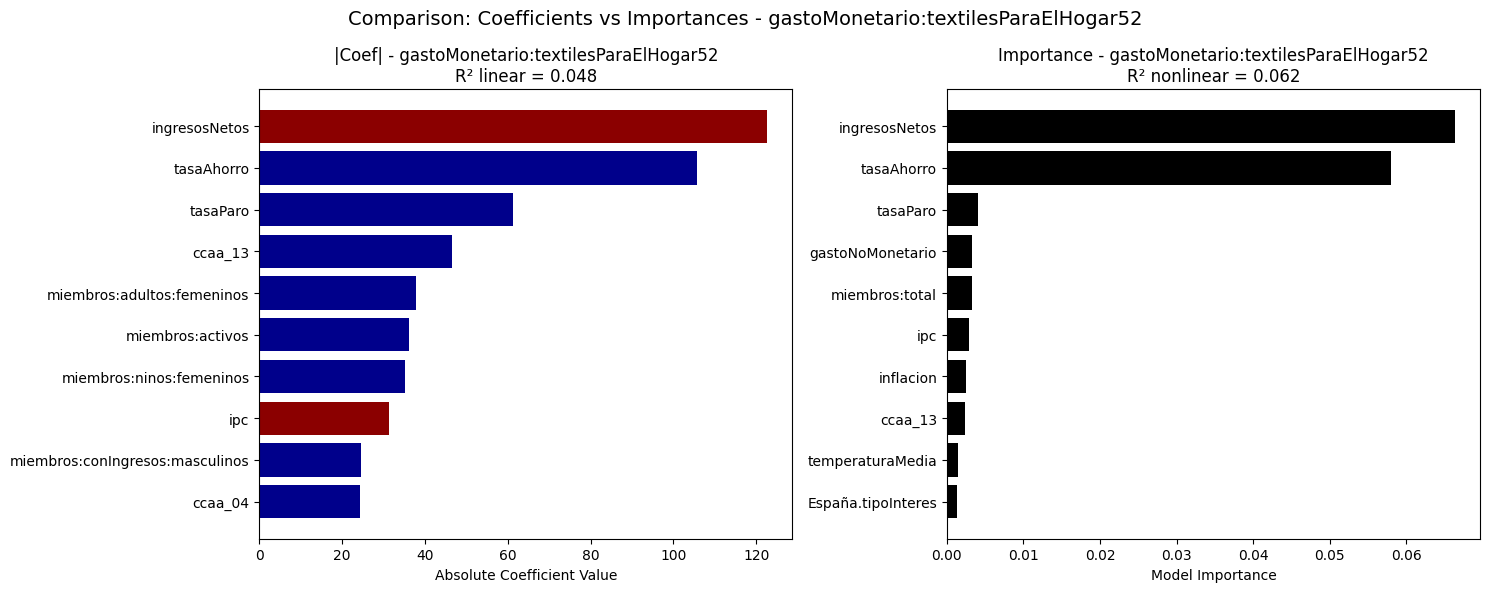

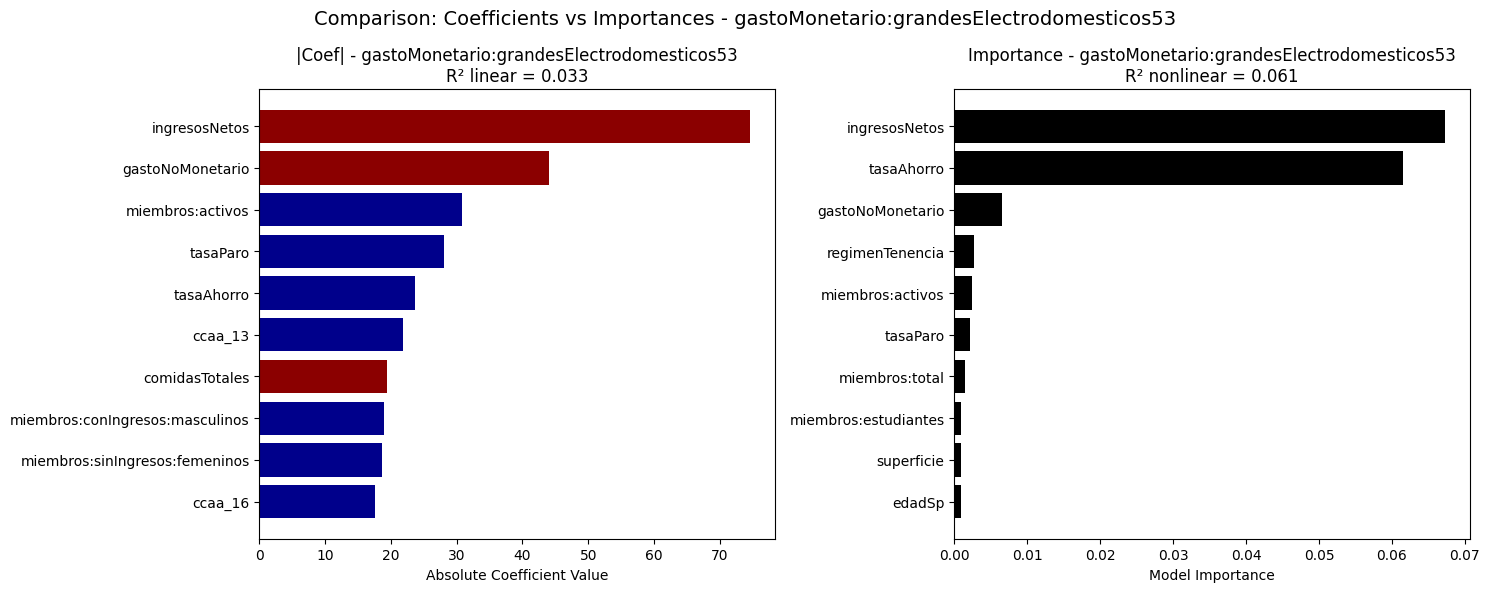

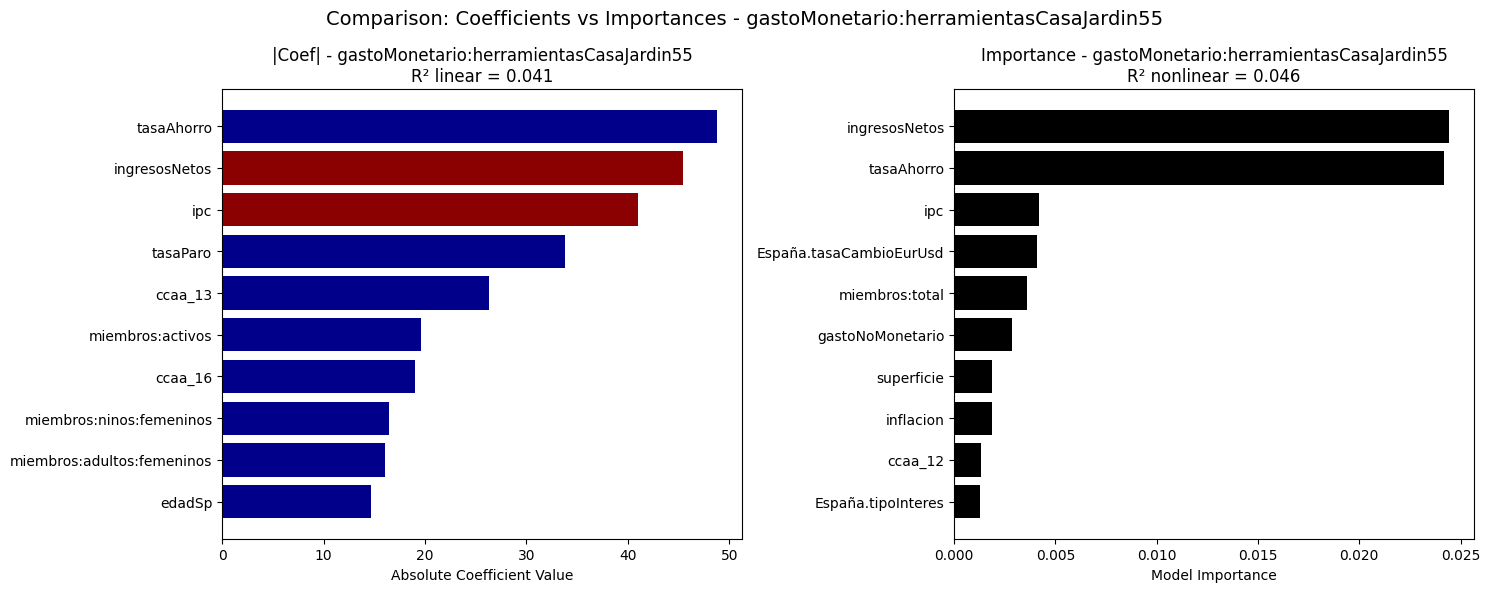

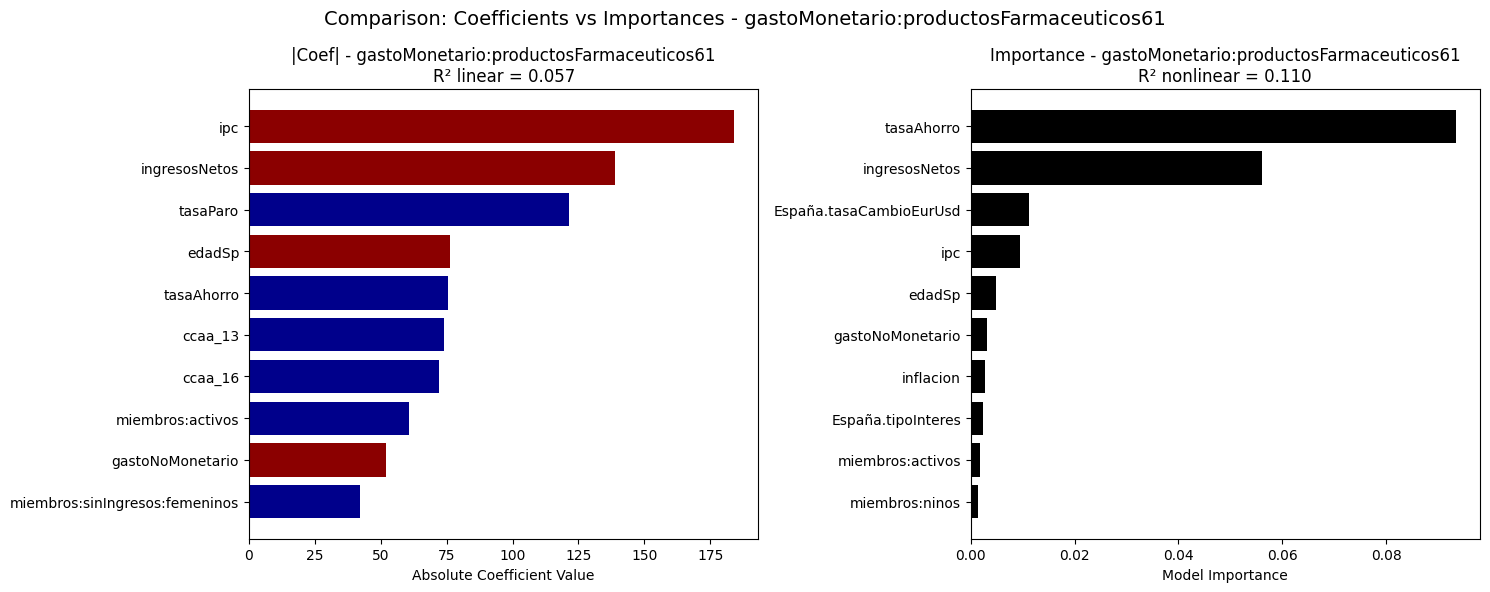

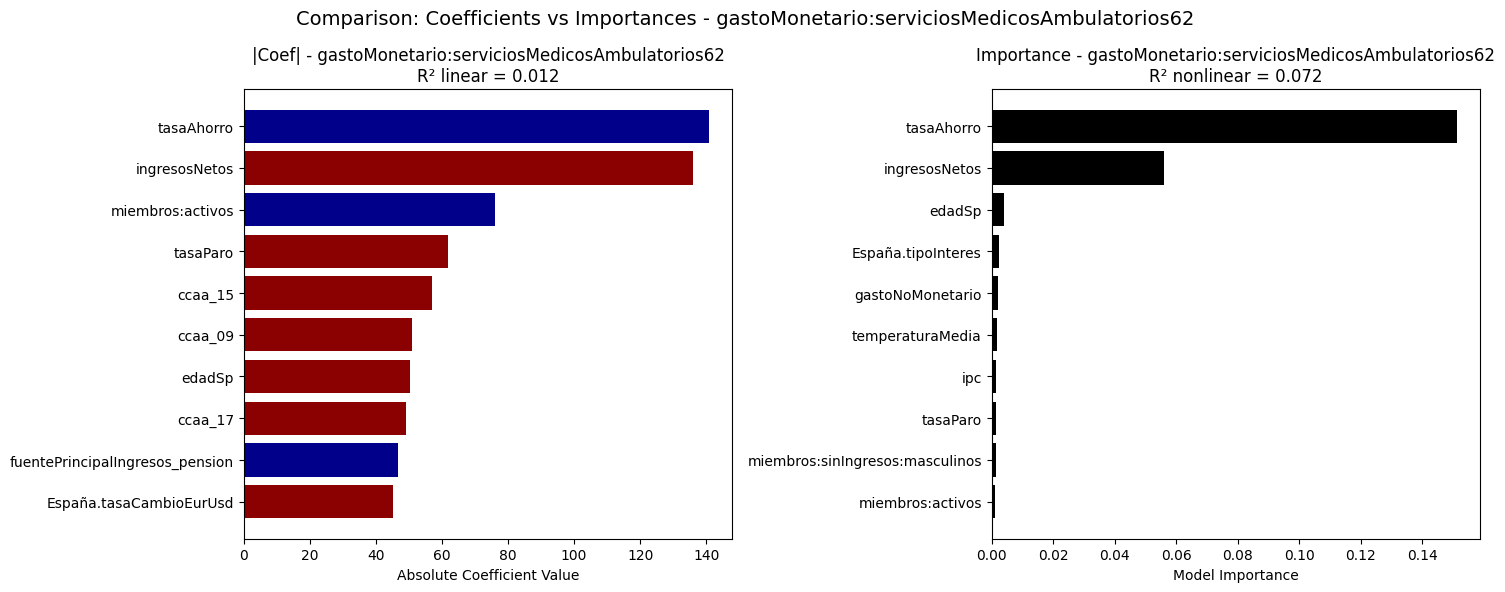

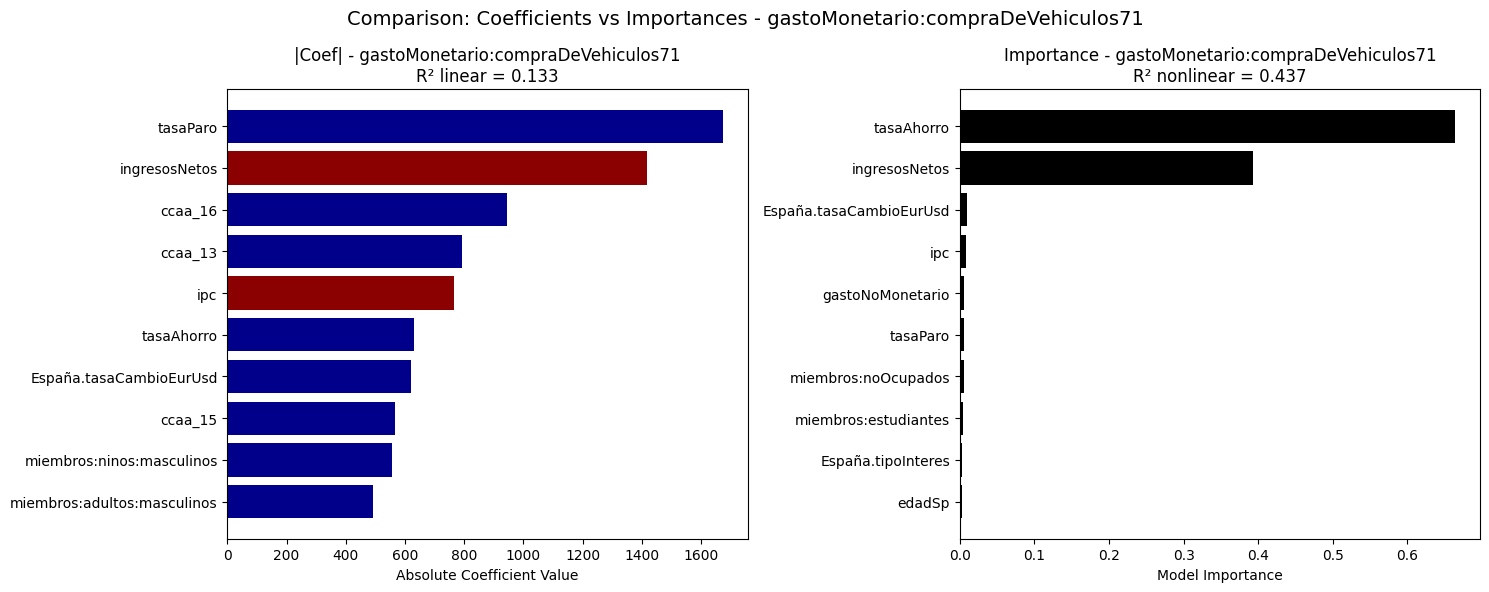

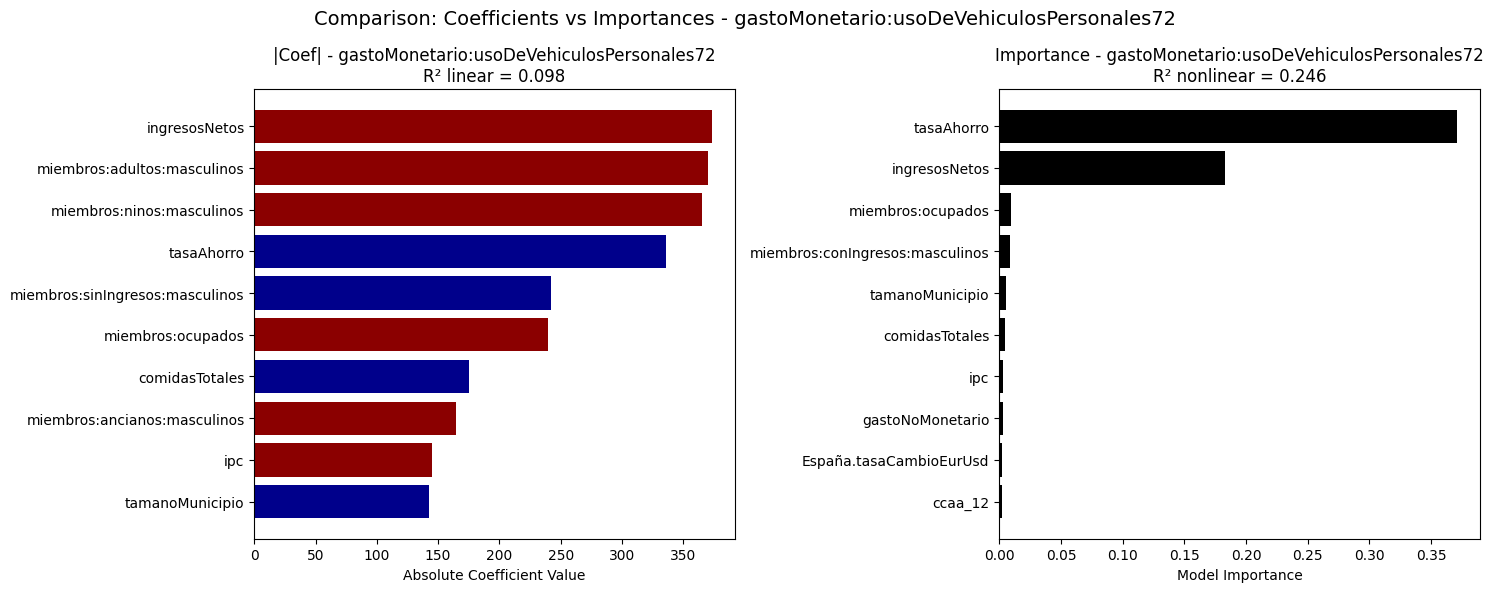

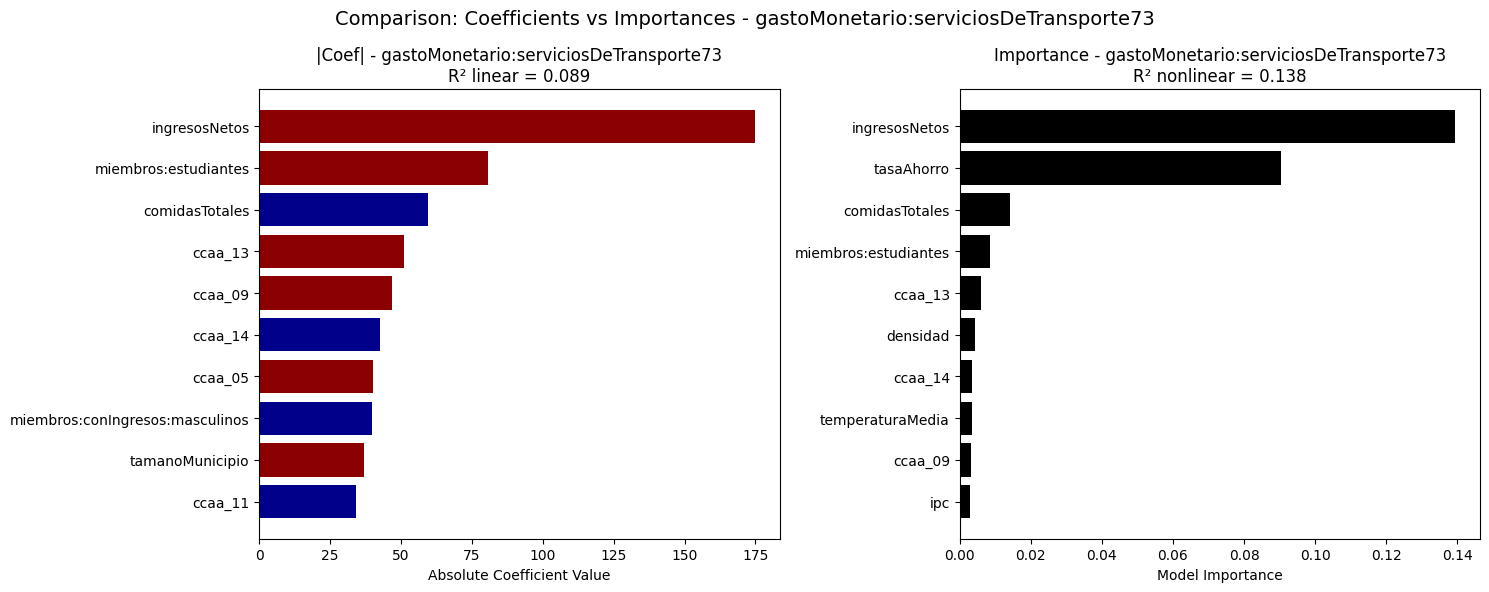

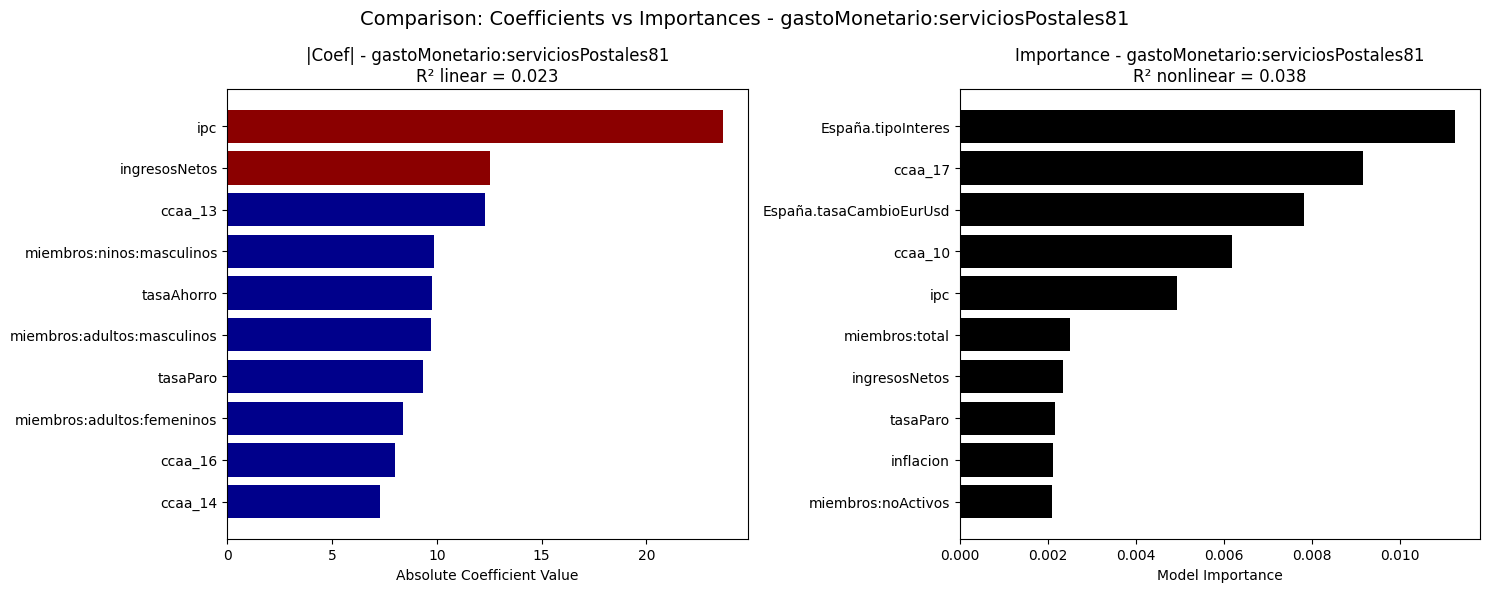

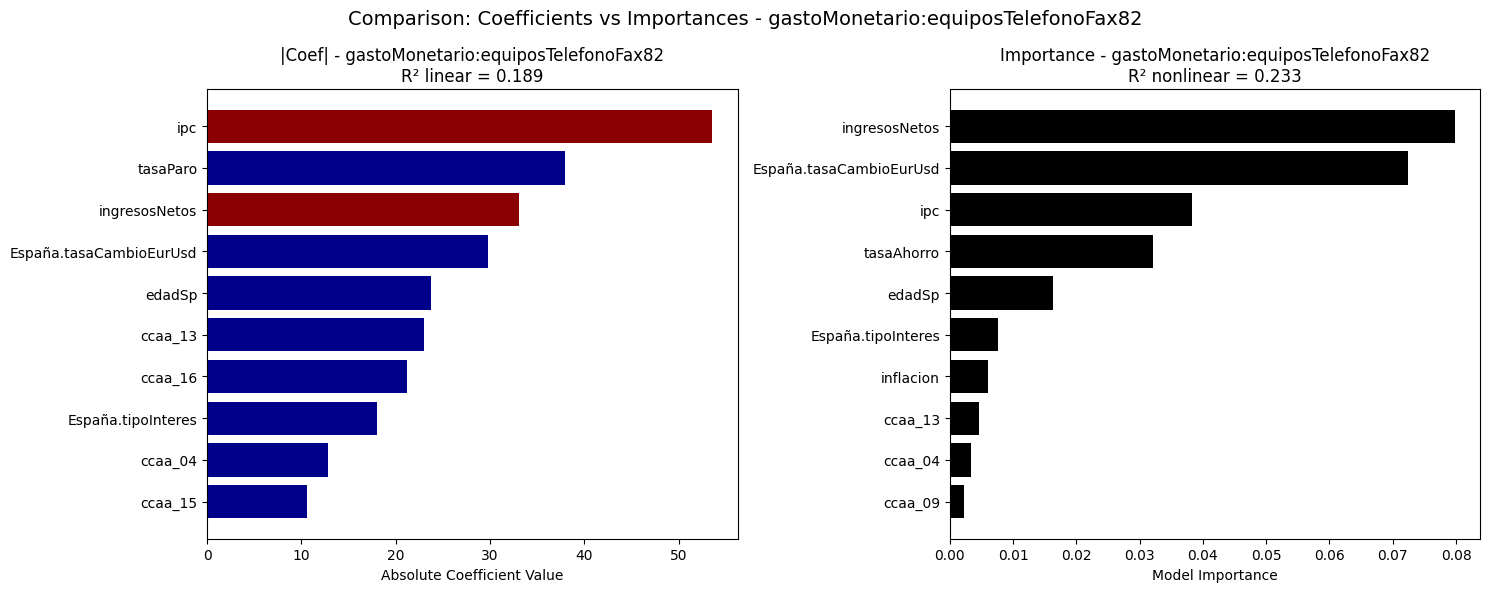

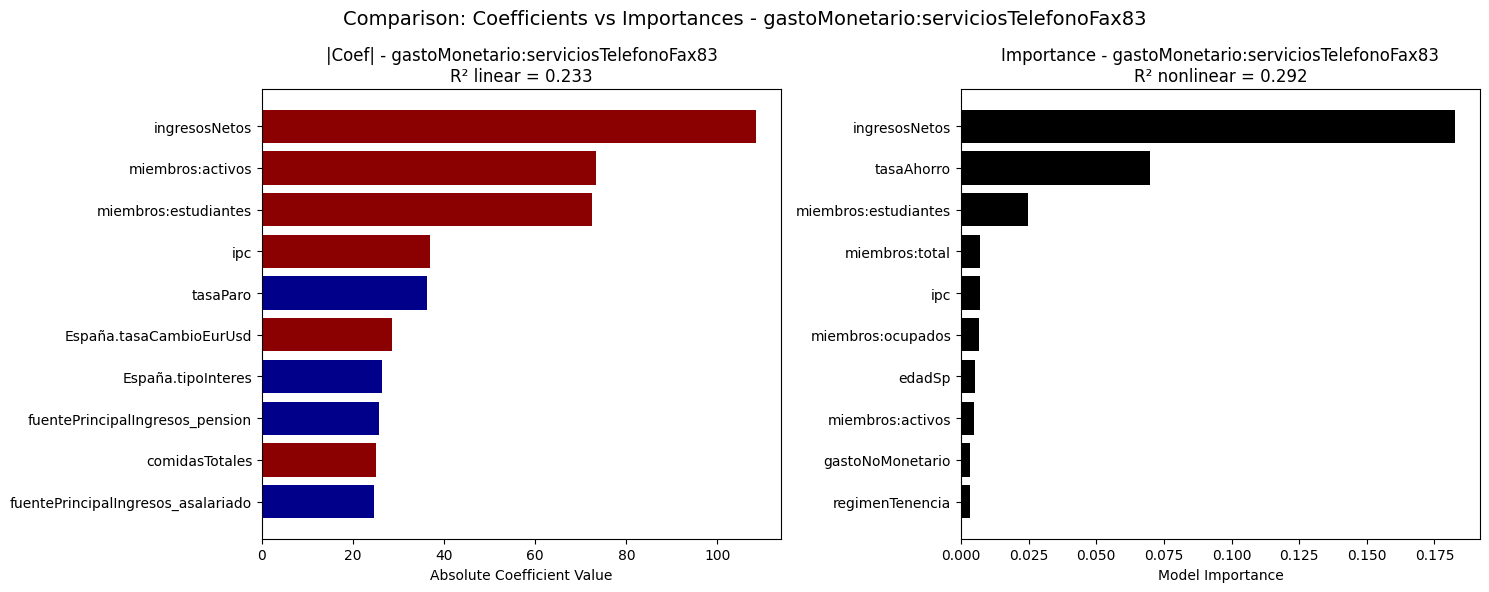

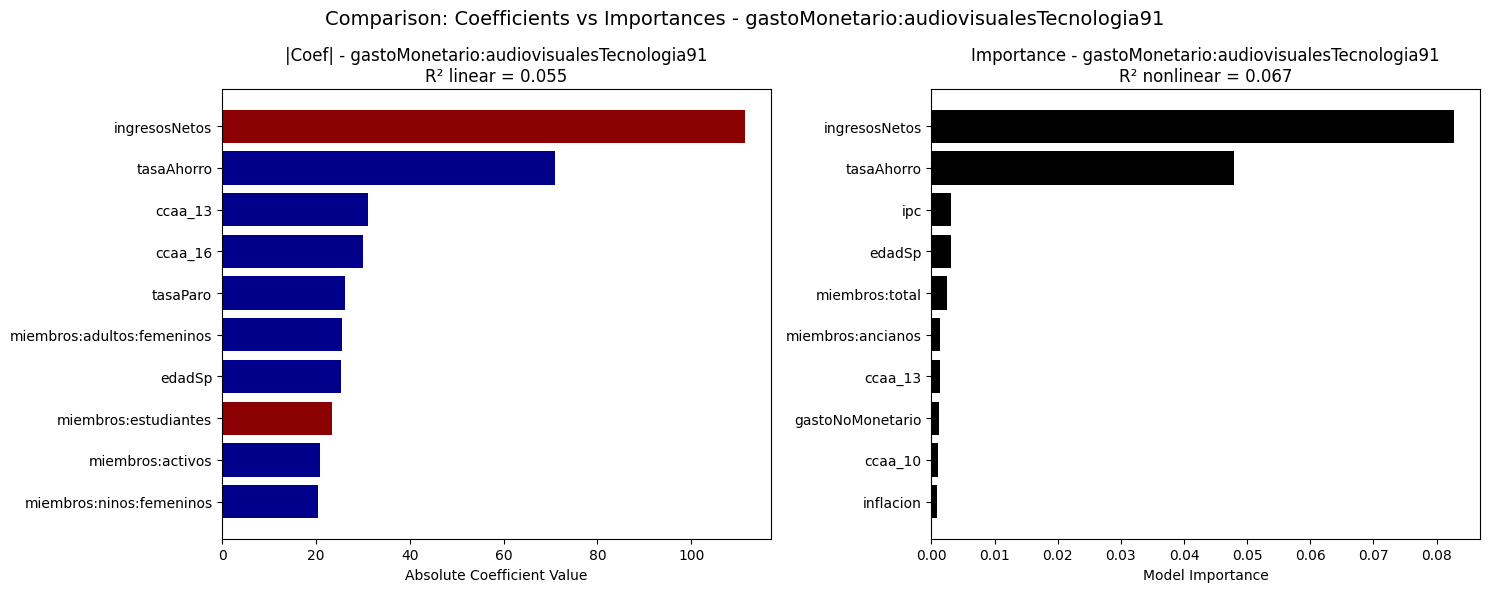

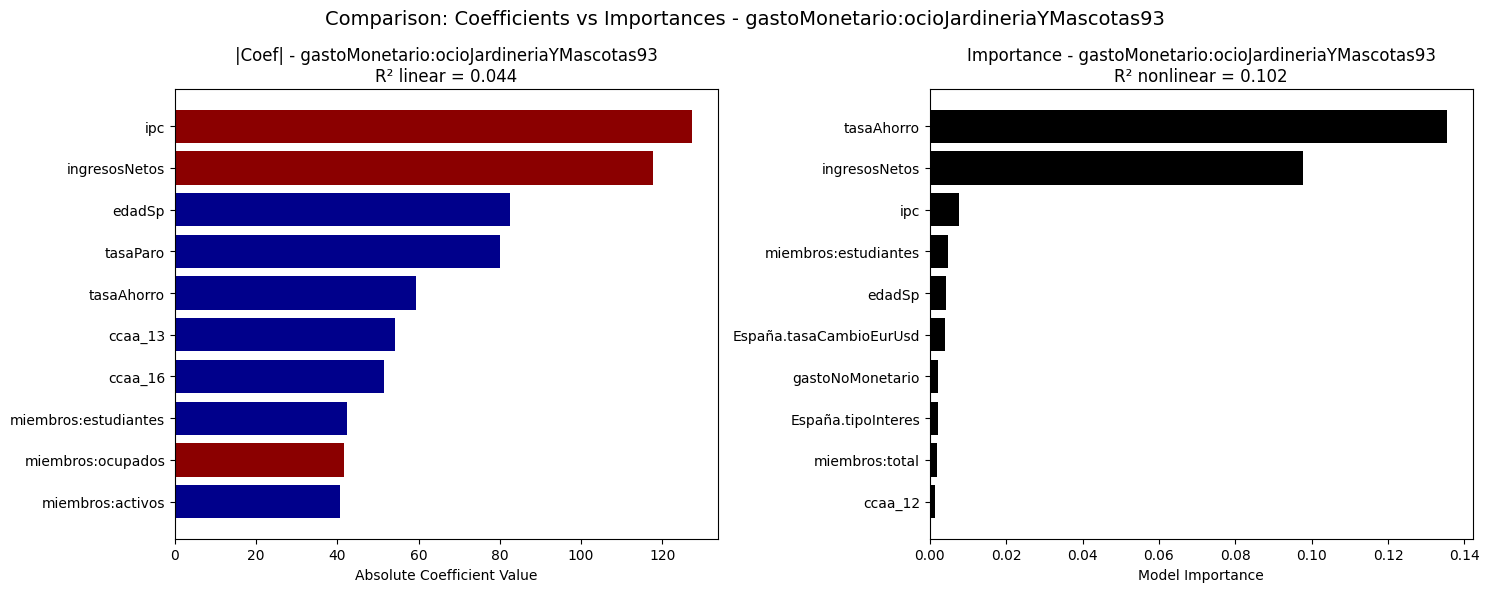

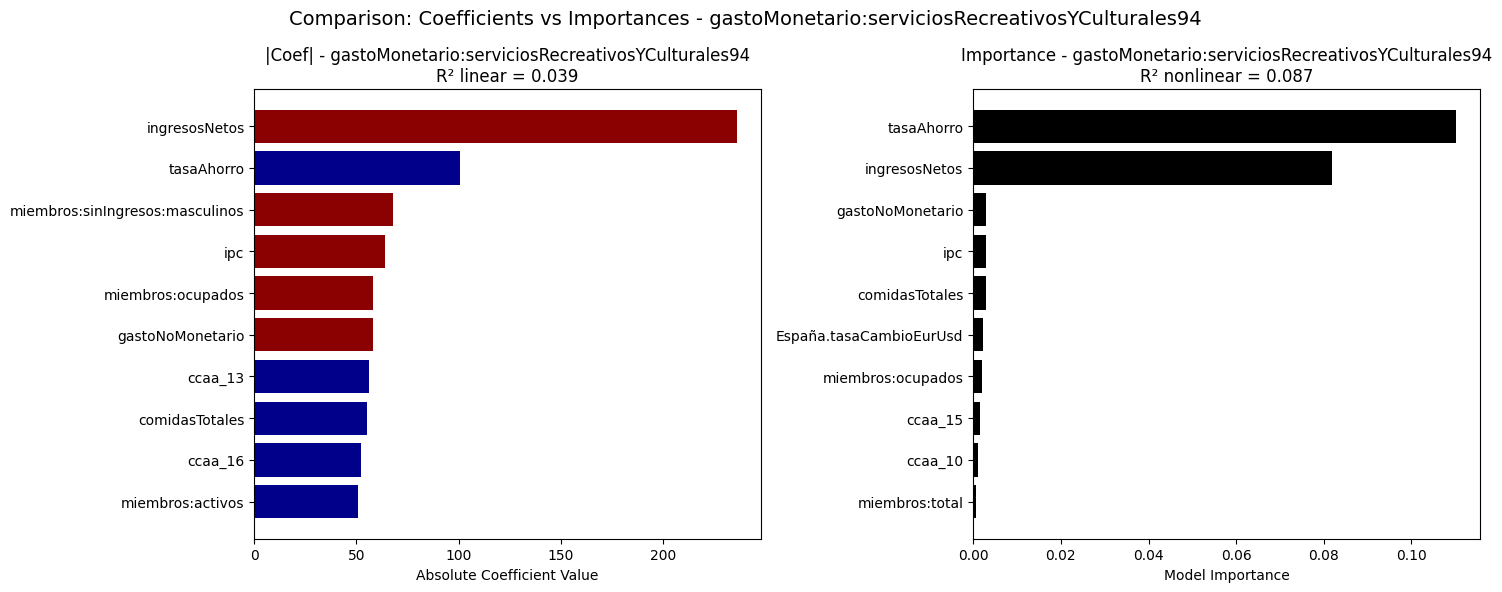

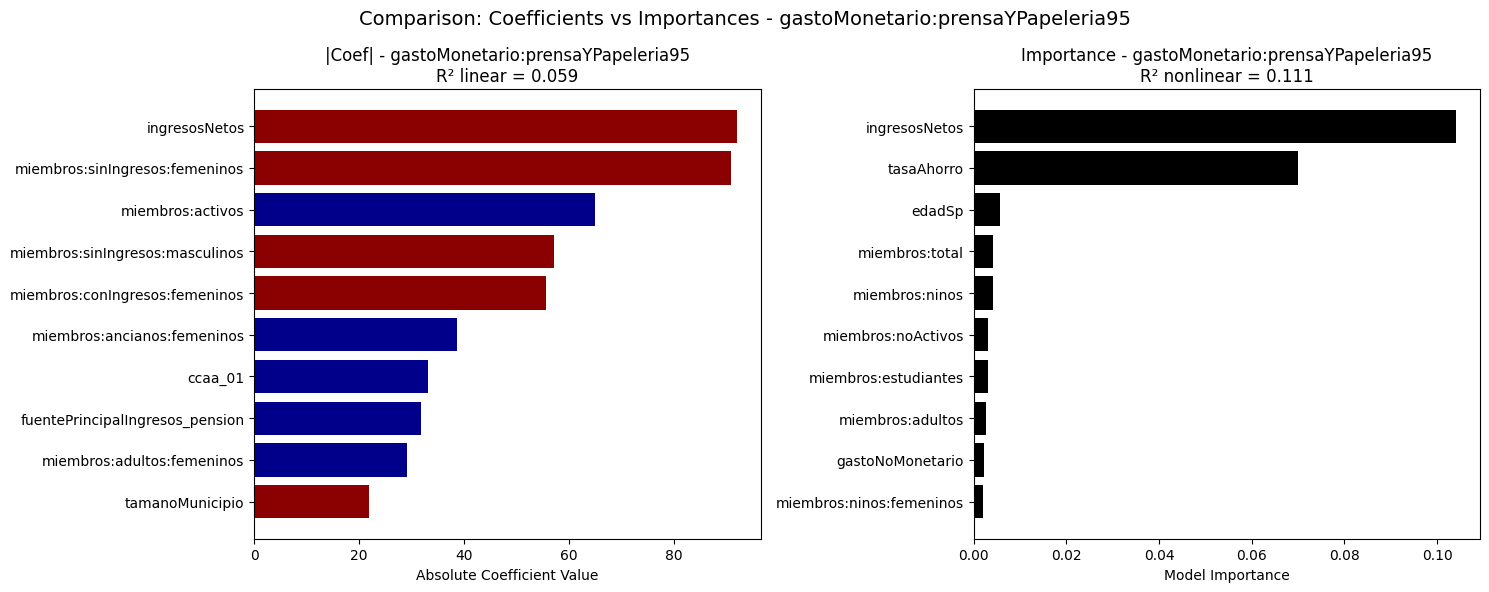

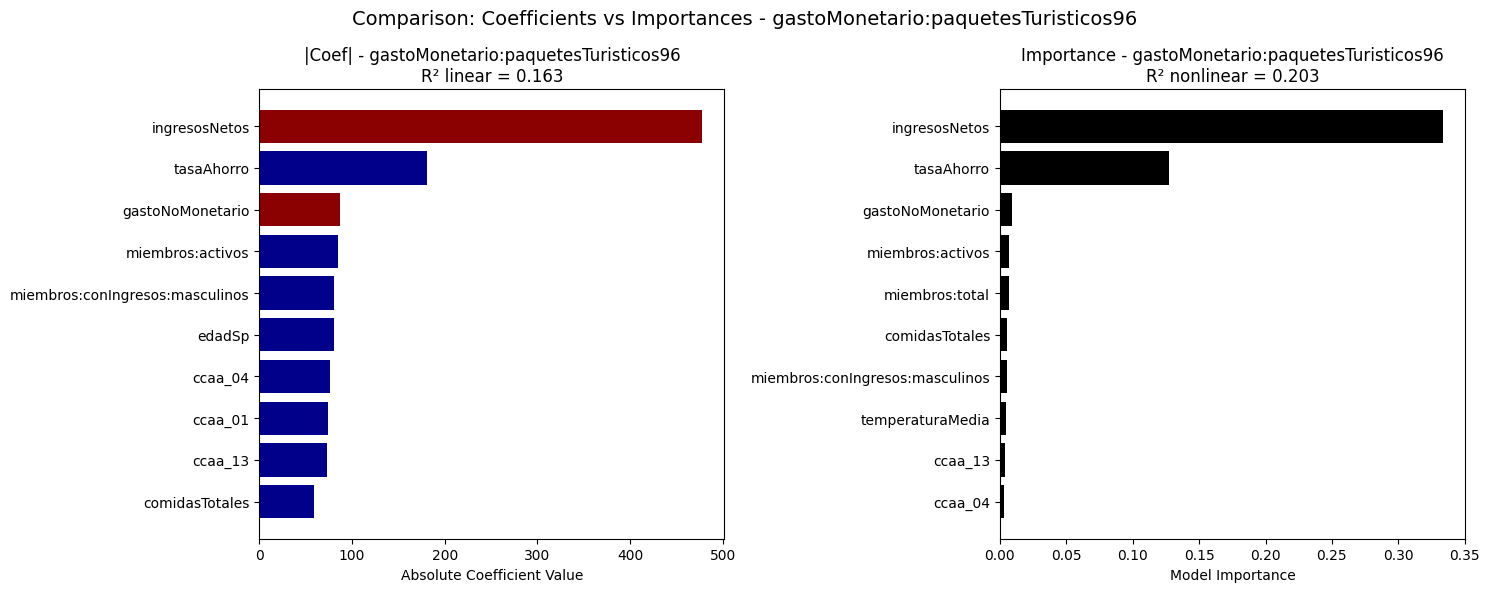

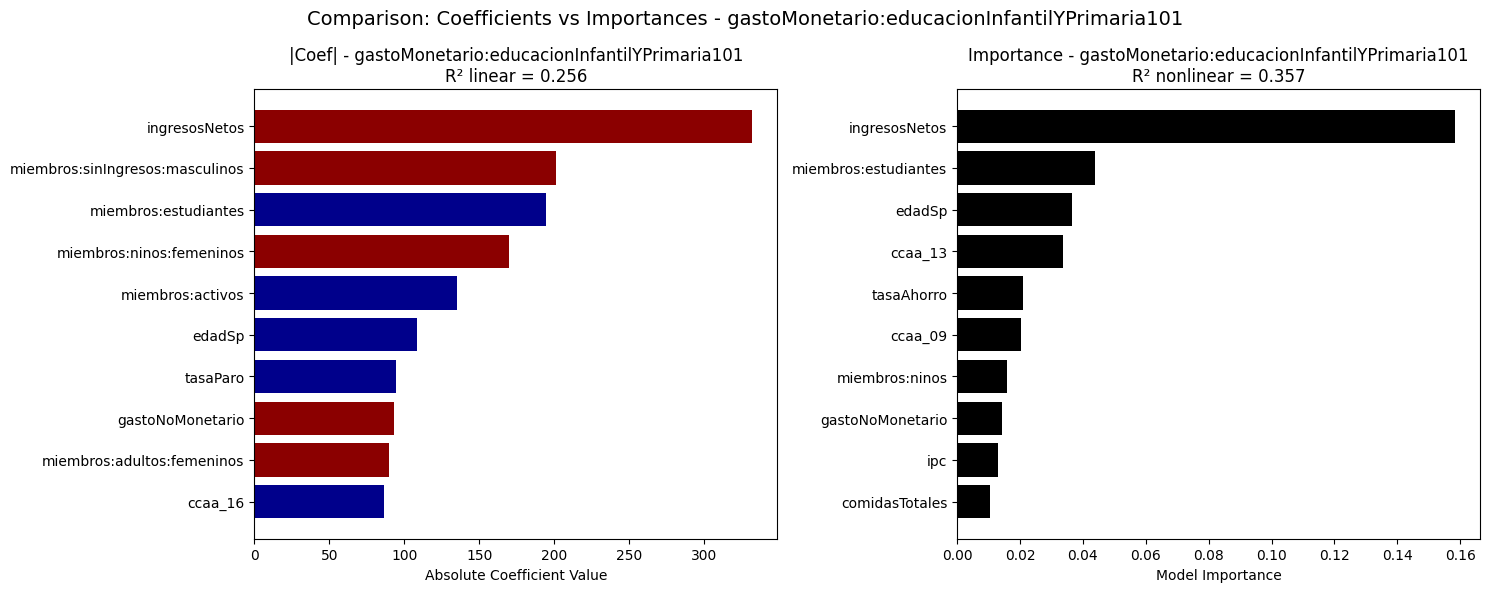

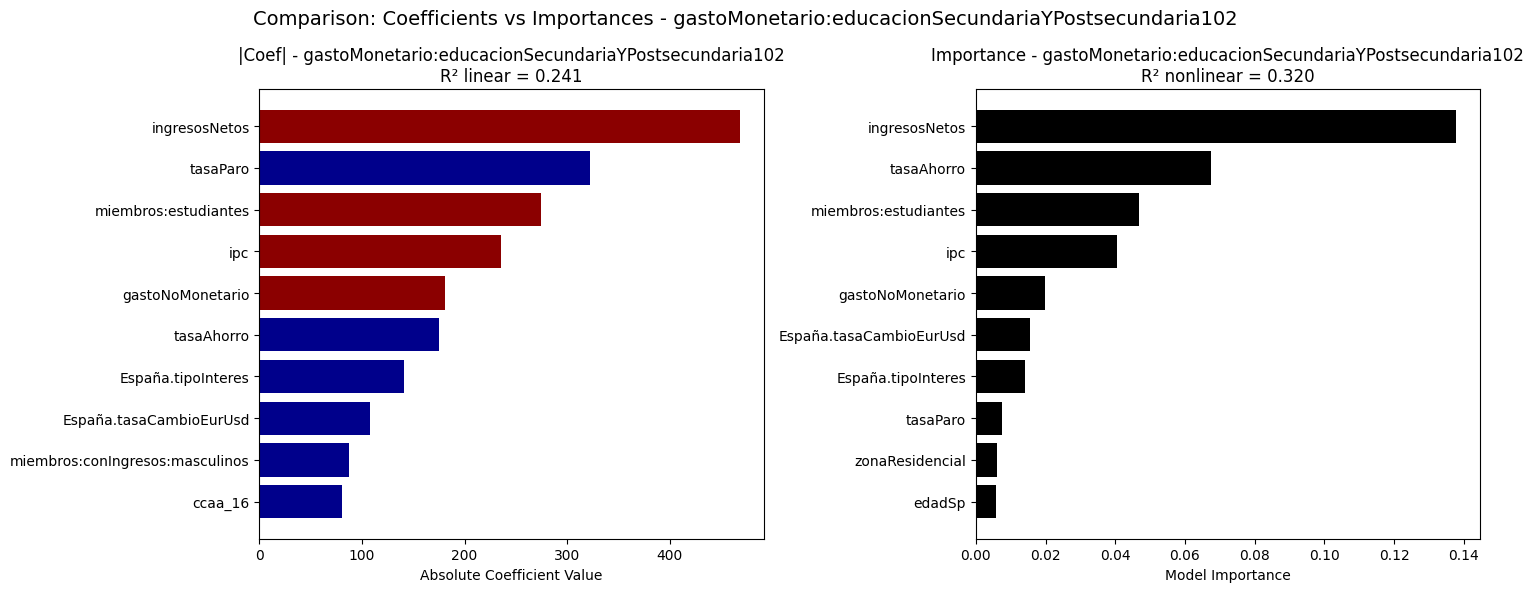

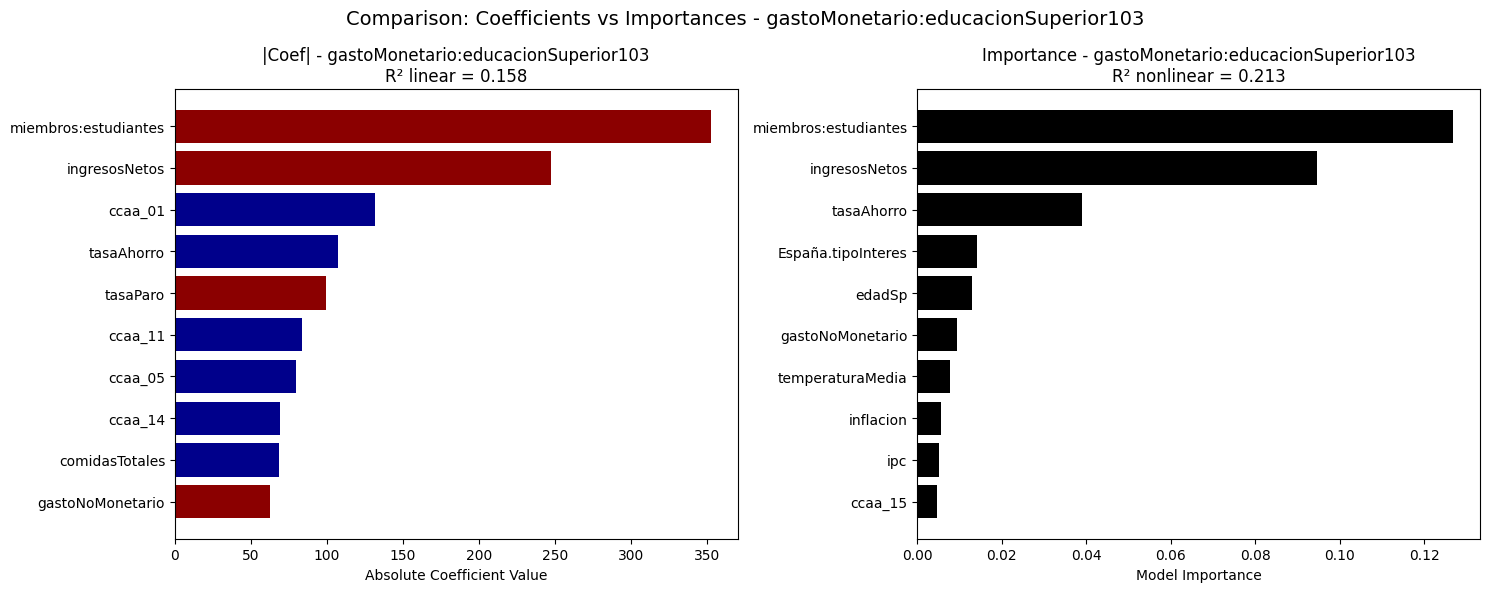

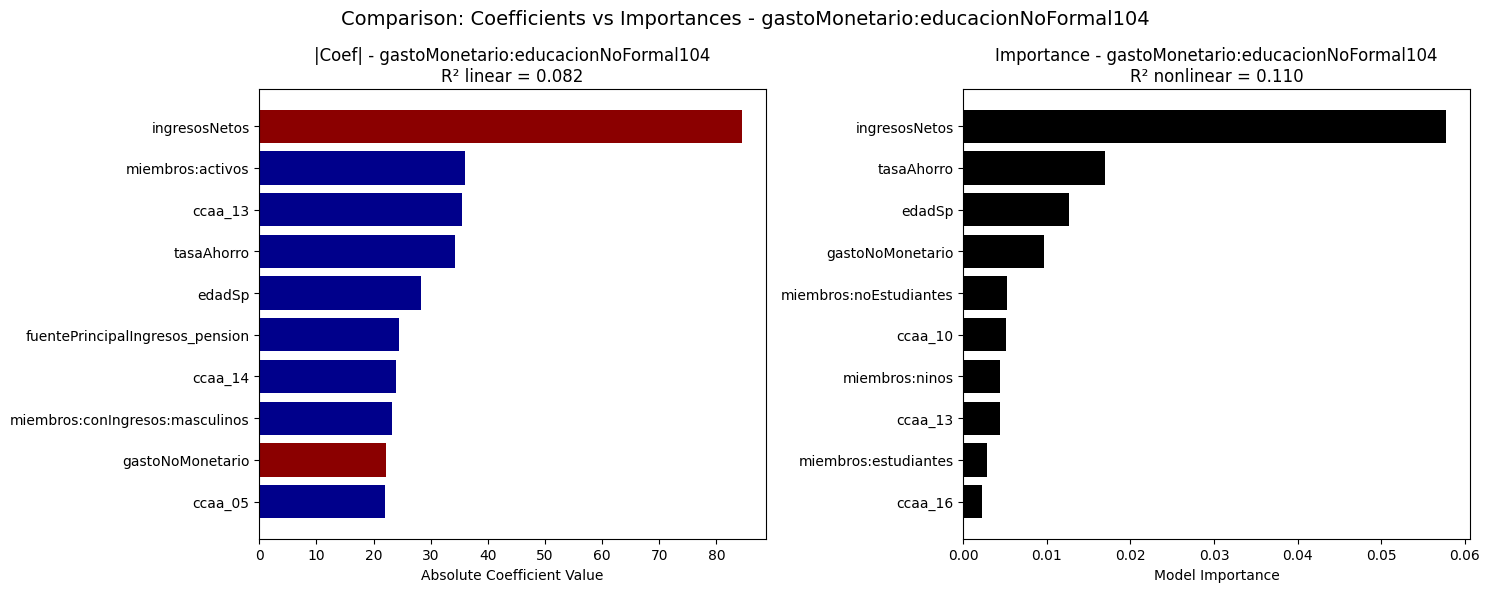

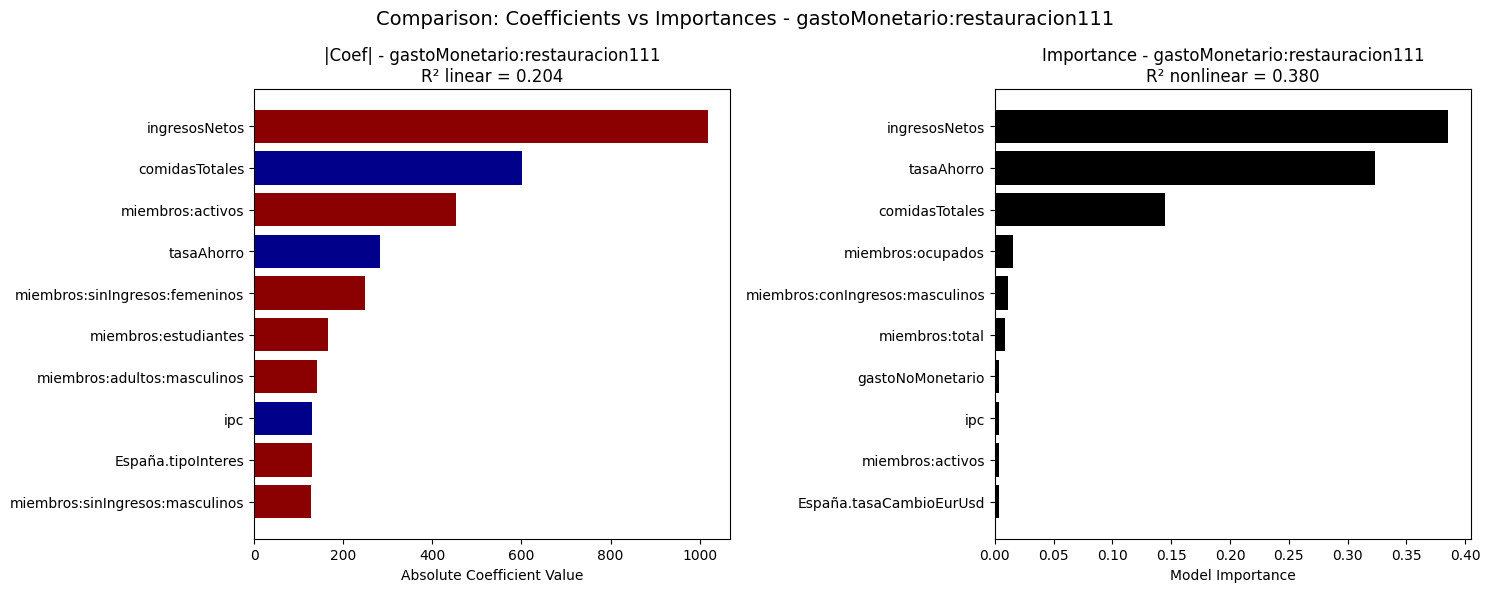

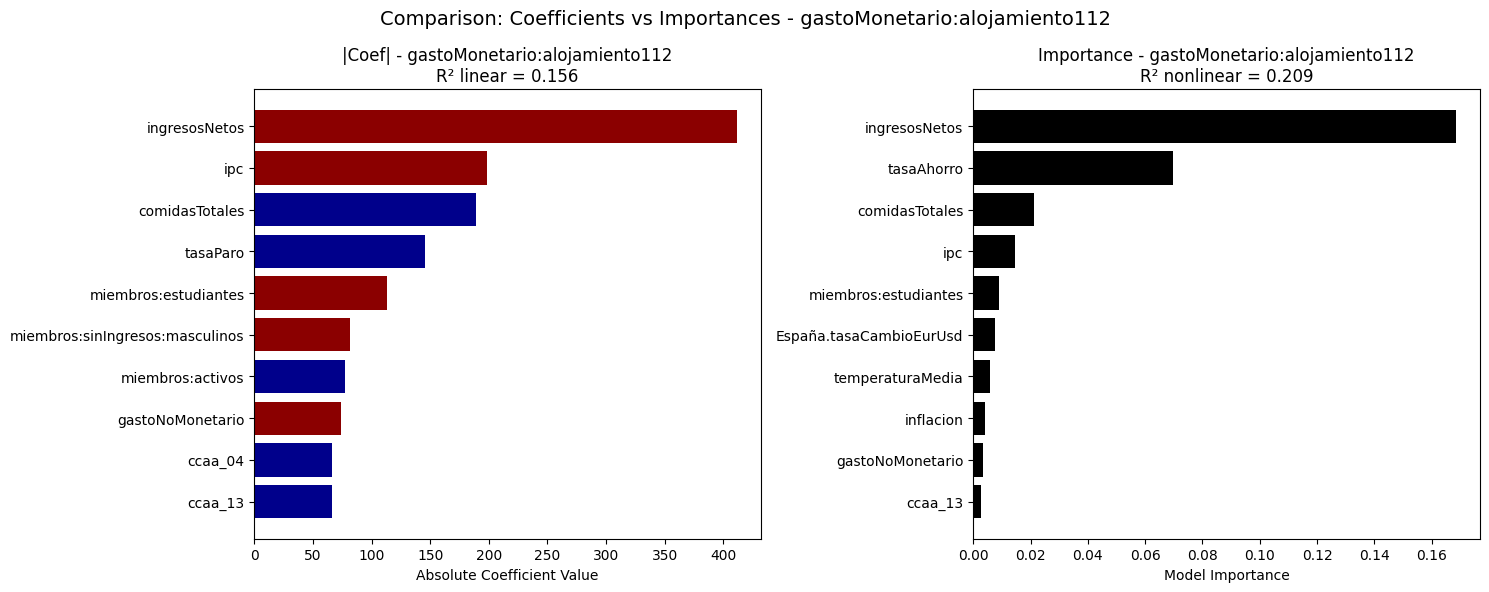

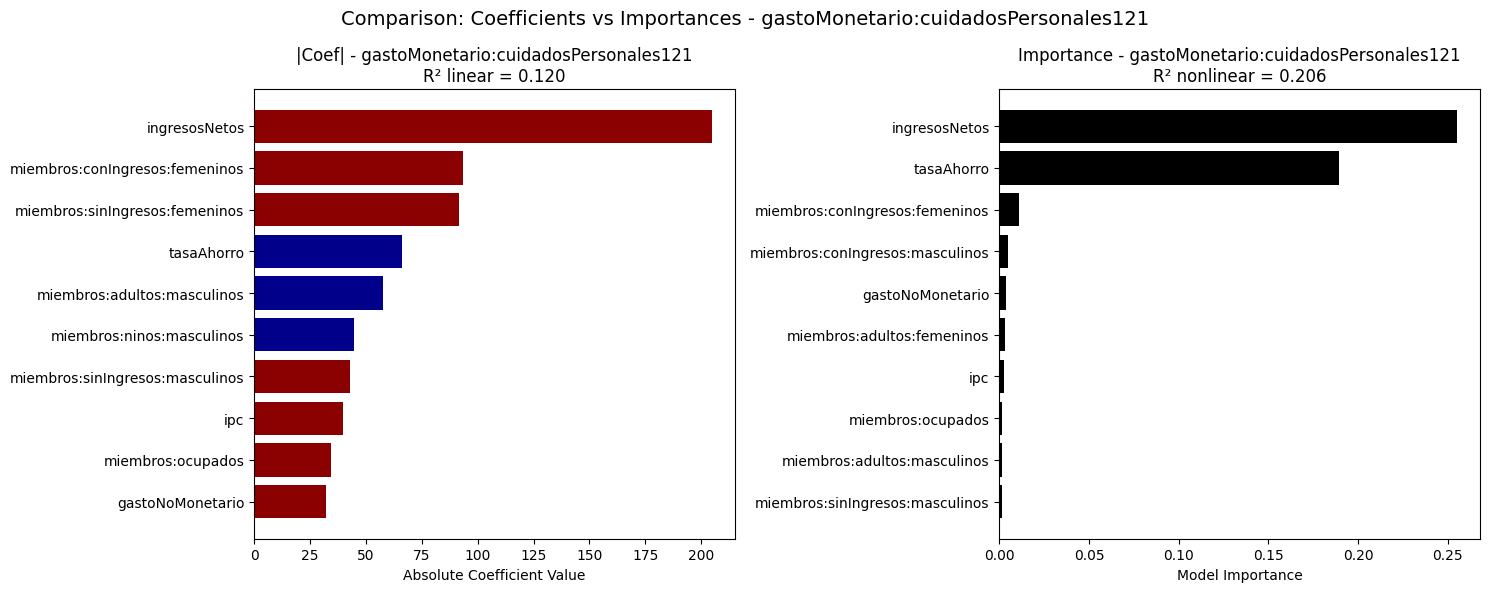

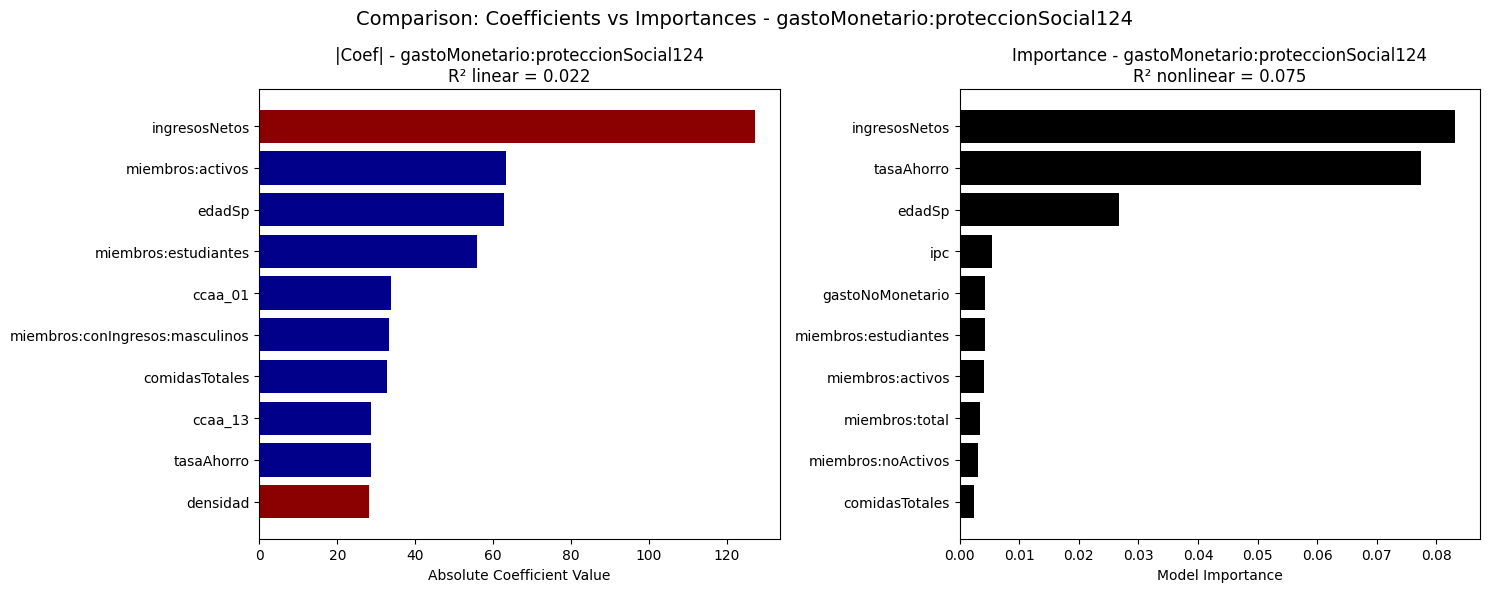

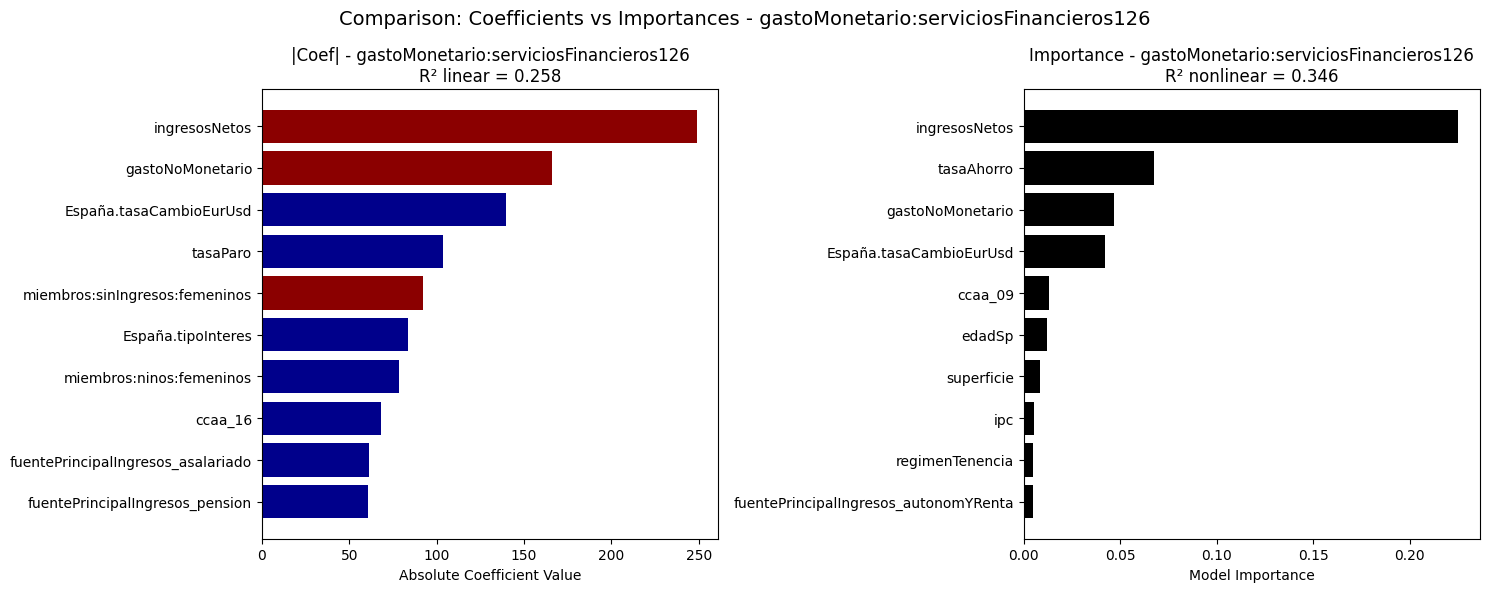

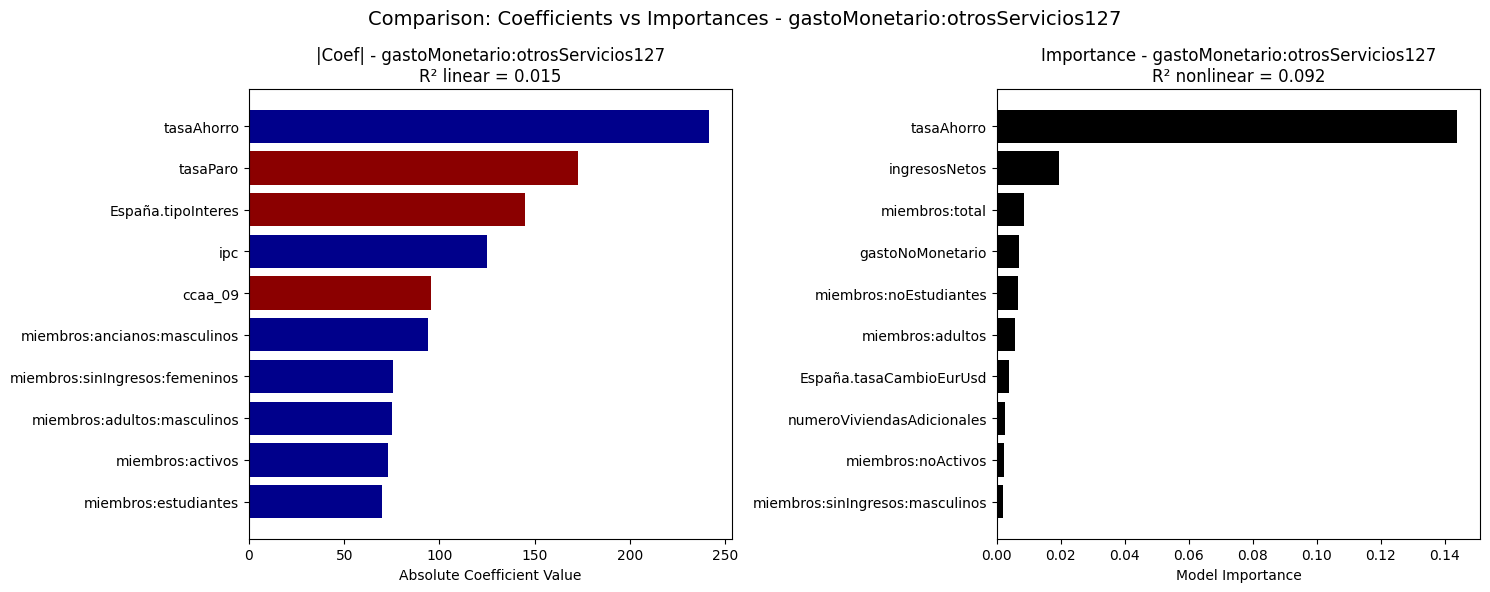

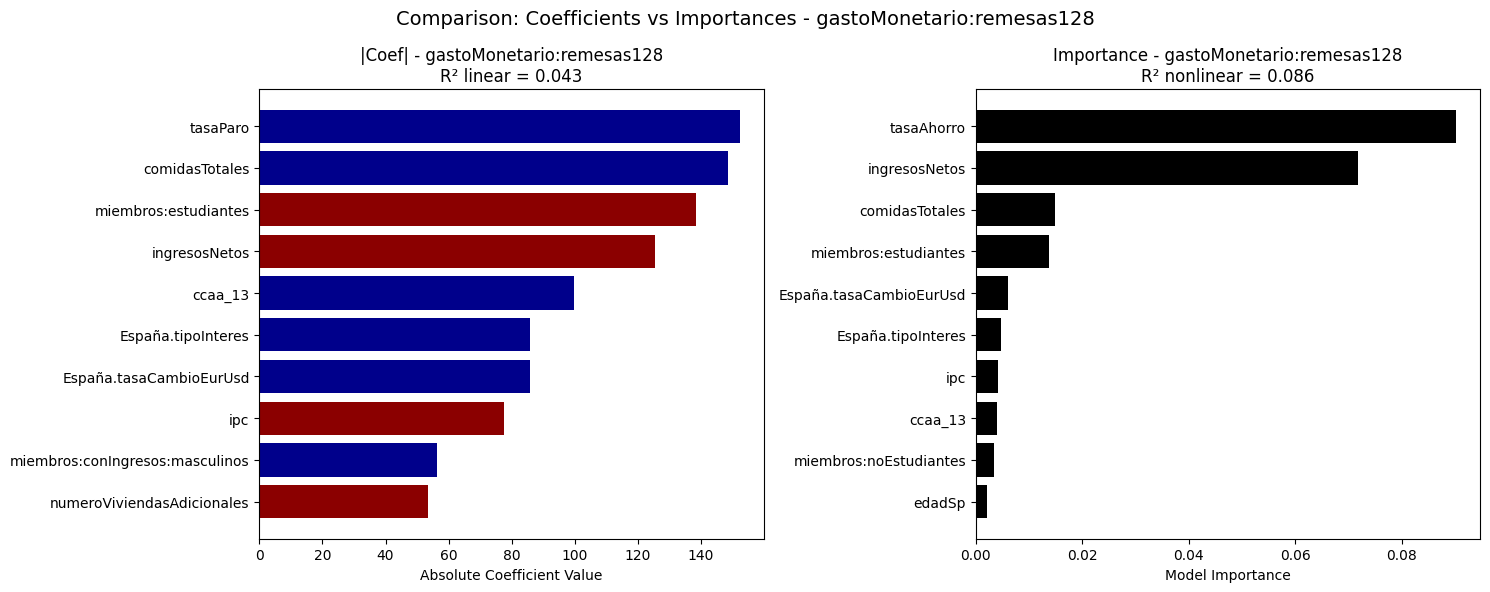

In [5]:
compare_coefficients_and_importances_with_r2(
    lineal_coefs_df,
    nonlineal_importances_df,
    metrics_lineal_df,
    metrics_nonlineal_df
)

### Tabla comparativa de la métrica R2

In [6]:
metrics_lineal_df

Gasto        R2  R2 Ajustado  \
0       gastoMonetario:alquileresRealesDeLaVivienda41  0.509035     0.508829   
1                   gastoMonetario:suministroDeAgua44  0.320394     0.320321   
2   gastoMonetario:electricidadGasOtrosCombustibles45  0.310753     0.310673   
3              gastoMonetario:productosAlimenticios11  0.296094     0.296026   
4              gastoMonetario:serviciosFinancieros126  0.257665     0.257489   
5        gastoMonetario:educacionInfantilYPrimaria101  0.255676     0.255221   
6   gastoMonetario:educacionSecundariaYPostsecunda...  0.241054     0.240658   
7               gastoMonetario:serviciosTelefonoFax83  0.233206     0.233117   
8                      gastoMonetario:restauracion111  0.203849     0.203756   
9                 gastoMonetario:equiposTelefonoFax82  0.188981     0.188715   
10                gastoMonetario:paquetesTuristicos96  0.162610     0.162337   
11                gastoMonetario:educacionSuperior103  0.158073     0.157600   
12                      gastoMonetario:alojamiento112  0.155592     0.155286   
13                          gastoMonetario:seguros125  0.146208     0.146064   
14                 gastoMonetario:compraDeVehiculos71  0.132633     0.132237   
15        gastoMonetario:bienesServiciosParaElHogar56  0.131150     0.131051   
16            gastoMonetario:serviciosHospitalarios63  0.125798     0.124729   
17              gastoMonetario:bebidasNoAlcoholicas12  0.119914     0.119808   
18               gastoMonetario:cuidadosPersonales121  0.119718     0.119644   
19          gastoMonetario:usoDeVehiculosPersonales72  0.097963     0.097830   
20                 gastoMonetario:articulosDeVestir31  0.091564     0.091443   
21             gastoMonetario:serviciosDeTransporte73  0.088905     0.088687   
22                gastoMonetario:educacionNoFormal104  0.081561     0.081052   
23                           gastoMonetario:calzado32  0.076722     0.076571   
24             gastoMonetario:mueblesRevestimientos51  0.060985     0.060760   
25                            gastoMonetario:tabaco22  0.059668     0.059429   
26                  gastoMonetario:prensaYPapeleria95  0.059193     0.058996   
27            gastoMonetario:productosFarmaceuticos61  0.056959     0.056798   
28         gastoMonetario:mantenimientoDeLaVivienda43  0.055642     0.055389   
29           gastoMonetario:audiovisualesTecnologia91  0.055348     0.055142   
30                gastoMonetario:bebidasAlcoholicas21  0.051164     0.051007   
31               gastoMonetario:textilesParaElHogar52  0.048420     0.048162   
32                gastoMonetario:efectosPersonales123  0.044841     0.044645   
33           gastoMonetario:ocioJardineriaYMascotas93  0.043668     0.043484   
34                          gastoMonetario:remesas128  0.043281     0.043001   
35            gastoMonetario:herramientasCasaJardin55  0.040825     0.040551   
36   gastoMonetario:serviciosRecreativosYCulturales94  0.039302     0.039135   
37          gastoMonetario:grandesElectrodomesticos53  0.033331     0.033150   
38                 gastoMonetario:serviciosPostales81  0.023436     0.022989   
39                 gastoMonetario:proteccionSocial124  0.022480     0.022204   
40             gastoMonetario:bienesDuraderosDeOcio92  0.022079     0.021722   
41                   gastoMonetario:otrosServicios127  0.014798     0.014462   
42                gastoMonetario:utensiliosDelHogar54  0.013882     0.013654   
43      gastoMonetario:serviciosMedicosAmbulatorios62  0.012141     0.011973   

             AIC           BIC       N           MSE  
0   1.878998e+06  1.879428e+06  105027  3.443099e+06  
1   5.635771e+06  5.636203e+06  360364  3.625824e+05  
2   5.633917e+06  5.634381e+06  361880  3.378481e+05  
3   6.567387e+06  6.567776e+06  362510  4.318223e+06  
4   2.528982e+06  2.529360e+06  156592  6.042662e+05  
5   1.063368e+06  1.063730e+06   63791  1.015029e+06  
6   1.210836e+06  1.211175e+06   69088  2.390595e+06  
7   5.2

In [7]:
metrics_nonlineal_df

Target        R2
0       gastoMonetario:alquileresRealesDeLaVivienda41  0.740749
1              gastoMonetario:productosAlimenticios11  0.437256
2                  gastoMonetario:compraDeVehiculos71  0.436577
3                      gastoMonetario:restauracion111  0.380484
4                   gastoMonetario:suministroDeAgua44  0.361900
5        gastoMonetario:educacionInfantilYPrimaria101  0.357322
6   gastoMonetario:electricidadGasOtrosCombustibles45  0.349661
7              gastoMonetario:serviciosFinancieros126  0.346138
8   gastoMonetario:educacionSecundariaYPostsecunda...  0.320318
9               gastoMonetario:serviciosTelefonoFax83  0.292116
10          gastoMonetario:usoDeVehiculosPersonales72  0.246452
11        gastoMonetario:bienesServiciosParaElHogar56  0.244145
12                          gastoMonetario:seguros125  0.241388
13                gastoMonetario:equiposTelefonoFax82  0.232587
14                gastoMonetario:educacionSuperior103  0.212688
15                      gastoMonetario:alojamiento112  0.209162
16               gastoMonetario:cuidadosPersonales121  0.206279
17                gastoMonetario:paquetesTuristicos96  0.202552
18                 gastoMonetario:articulosDeVestir31  0.197783
19              gastoMonetario:bebidasNoAlcoholicas12  0.159157
20                           gastoMonetario:calzado32  0.150573
21             gastoMonetario:serviciosDeTransporte73  0.137688
22            gastoMonetario:serviciosHospitalarios63  0.117054
23                            gastoMonetario:tabaco22  0.113476
24                  gastoMonetario:prensaYPapeleria95  0.111237
25            gastoMonetario:productosFarmaceuticos61  0.110387
26                gastoMonetario:educacionNoFormal104  0.110121
27           gastoMonetario:ocioJardineriaYMascotas93  0.101568
28                   gastoMonetario:otrosServicios127  0.092496
29   gastoMonetario:serviciosRecreativosYCulturales94  0.087316
30                          gastoMonetario:remesas128  0.086121
31                gastoMonetario:bebidasAlcoholicas21  0.084659
32             gastoMonetario:mueblesRevestimientos51  0.082129
33         gastoMonetario:mantenimientoDeLaVivienda43  0.080287
34                 gastoMonetario:proteccionSocial124  0.074909
35      gastoMonetario:serviciosMedicosAmbulatorios62  0.071569
36           gastoMonetario:audiovisualesTecnologia91  0.067044
37               gastoMonetario:textilesParaElHogar52  0.062077
38          gastoMonetario:grandesElectrodomesticos53  0.061099
39                gastoMonetario:efectosPersonales123  0.049603
40            gastoMonetario:herramientasCasaJardin55  0.045936
41                 gastoMonetario:serviciosPostales81  0.037981
42                gastoMonetario:utensiliosDelHogar54  0.027984
43             gastoMonetario:bienesDuraderosDeOcio92  0.017191

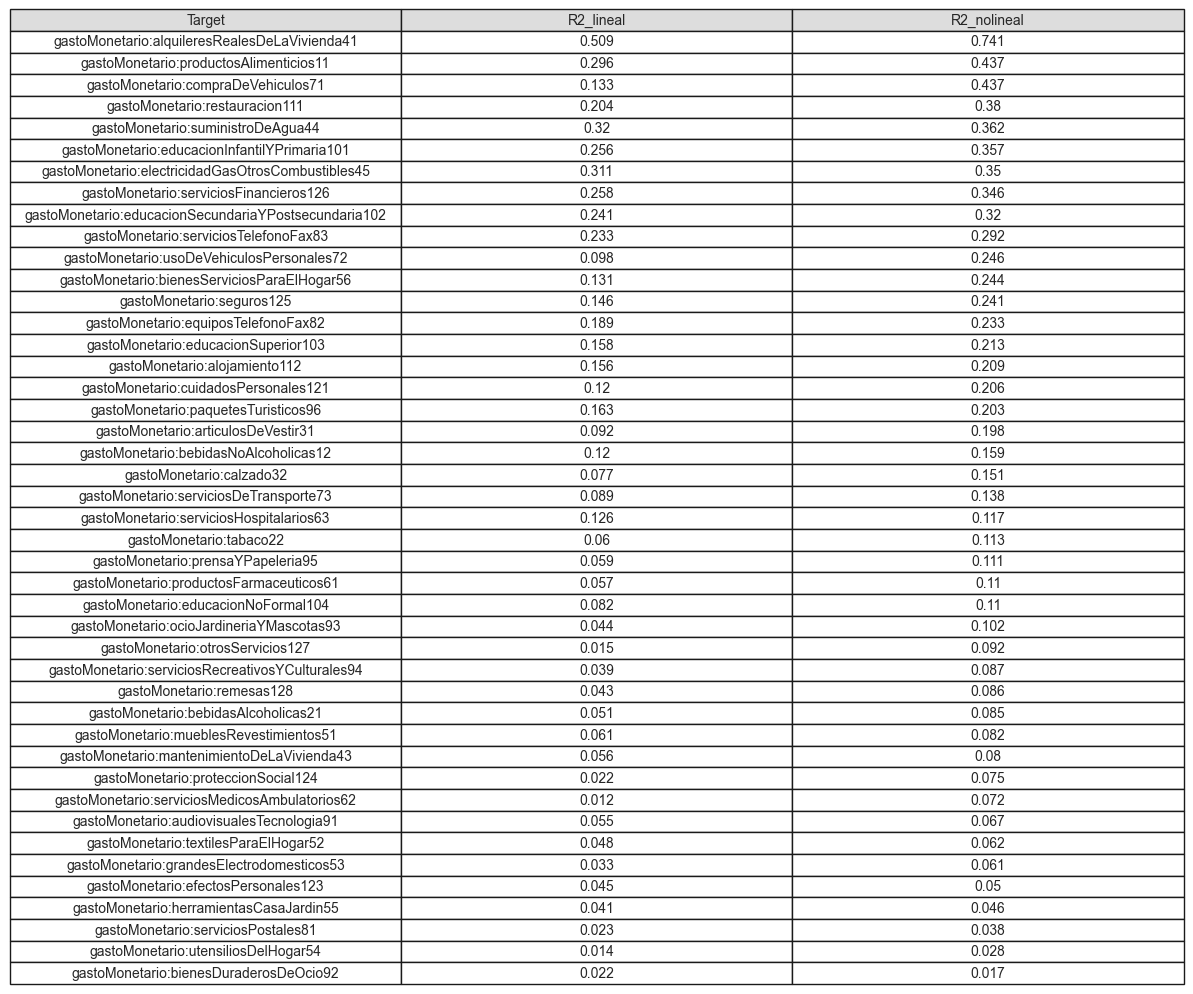

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df):
    # Fusionar ambos DataFrames por la columna correspondiente
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R2": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Ordenar de mayor a menor por R2 no lineal
    merged_sorted = merged.sort_values(by="R2_nolineal", ascending=False)

    # Crear tabla visual
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.axis('off')
    tabla = ax.table(
        cellText=merged_sorted.round(3).values,
        colLabels=merged_sorted.columns,
        loc='center',
        cellLoc='center',
        colColours=["#dddddd"] * len(merged_sorted.columns)
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()

# Llamada
plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df)


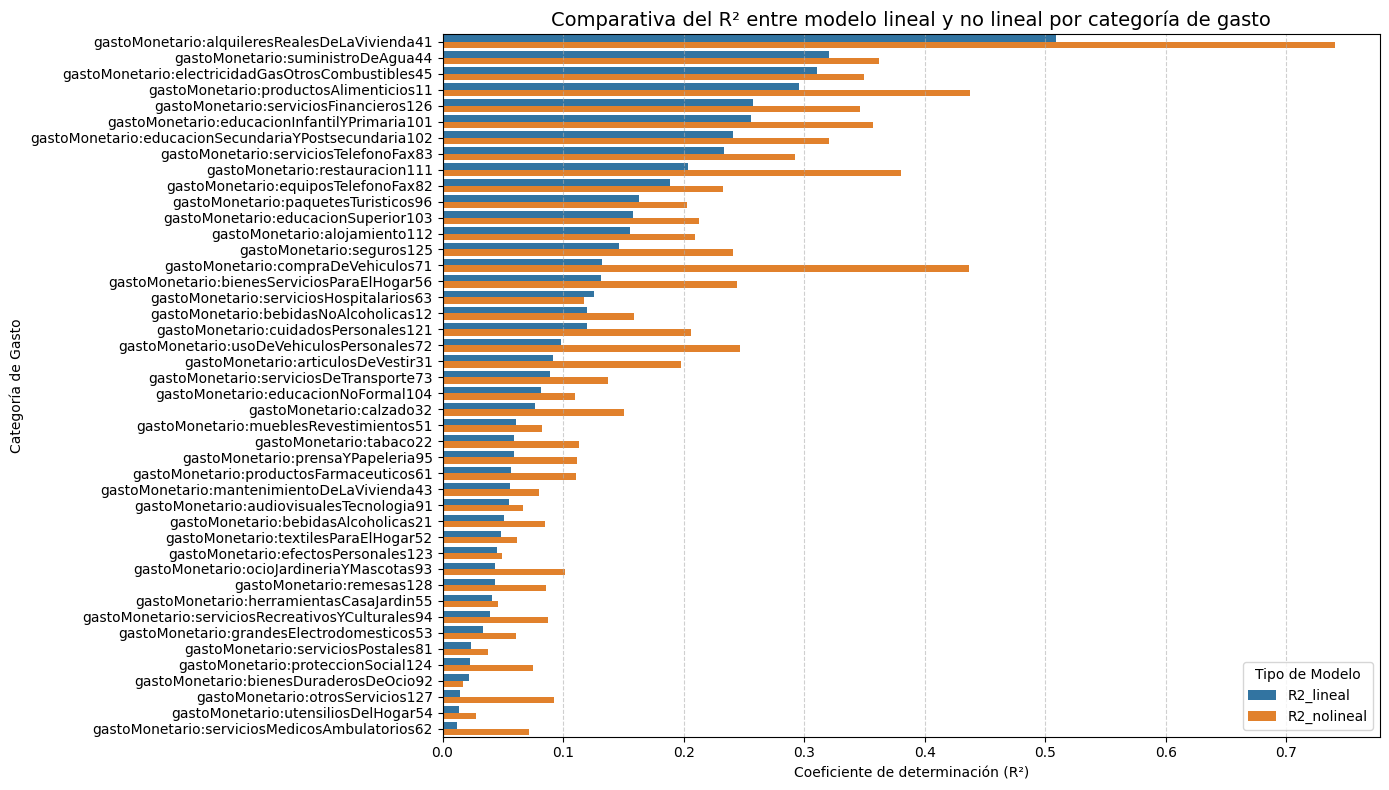

In [9]:
import seaborn as sns

def plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df, top_n=45):
    # Renombrar y unir
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R2": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Ordenar por R² lineal
    merged.sort_values(by="R2_lineal", ascending=False, inplace=True)
    top = merged.head(top_n)

    # Convertir a formato largo para seaborn
    melted = pd.melt(top, id_vars="Target", value_vars=["R2_lineal", "R2_nolineal"],
                     var_name="Modelo", value_name="R²")

    plt.figure(figsize=(14, 8))
    sns.barplot(data=melted, x="R²", y="Target", hue="Modelo")
    plt.title("Comparativa del R² entre modelo lineal y no lineal por categoría de gasto", fontsize=14)
    plt.xlabel("Coeficiente de determinación (R²)")
    plt.ylabel("Categoría de Gasto")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.legend(title="Tipo de Modelo")
    plt.tight_layout()
    plt.show()

plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df)

# Comparativa mse

In [10]:

mse_no_lineal_df = pd.read_csv(
    '../../datamarts/mse_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

mse_no_lineal_df.rename(columns={'MSE': 'MSE_no_lineal'}, inplace=True)

In [11]:
mse_lineal_df = metrics_lineal_df.rename(columns={"Gasto": "Target", "MSE": "MSE_lineal"})

mse_lineal_df = mse_lineal_df[['Target', 'MSE_lineal']]

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_mse_comparison(metrics_lineal_df, mse_no_lineal_df, top_n=30):
    # Renombrar columnas y unir
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "MSE": "MSE_lineal"})
    df_nolineal = mse_no_lineal_df.rename(columns={"MSE_no_lineal": "MSE_nolineal"})

    merged = pd.merge(df_lineal[["Target", "MSE_lineal"]], df_nolineal, on="Target")

    merged["Target"] = merged["Target"].str.replace("gastoMonetario:", "", regex=False)


    # Ordenar y seleccionar top
    merged.sort_values(by="MSE_lineal", ascending=True, inplace=True)
    top = merged.head(top_n)

    # Preparar formato largo para Seaborn
    melted = pd.melt(top, id_vars="Target", value_vars=["MSE_lineal", "MSE_nolineal"],
                     var_name="Modelo", value_name="MSE")

    # Estilo gráfico
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 10))
    ax = sns.barplot(data=melted, x="MSE", y="Target", hue="Modelo", palette="pastel", edgecolor=".2")

    # Mejoras visuales
    plt.title("Comparativa del MSE entre modelos lineal y no lineal", fontsize=16)
    plt.xlabel("Error cuadrático medio (MSE)", fontsize=12)
    plt.ylabel("Categoría de Gasto", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Modelo", loc="upper right")
    plt.tight_layout()

    plt.show()


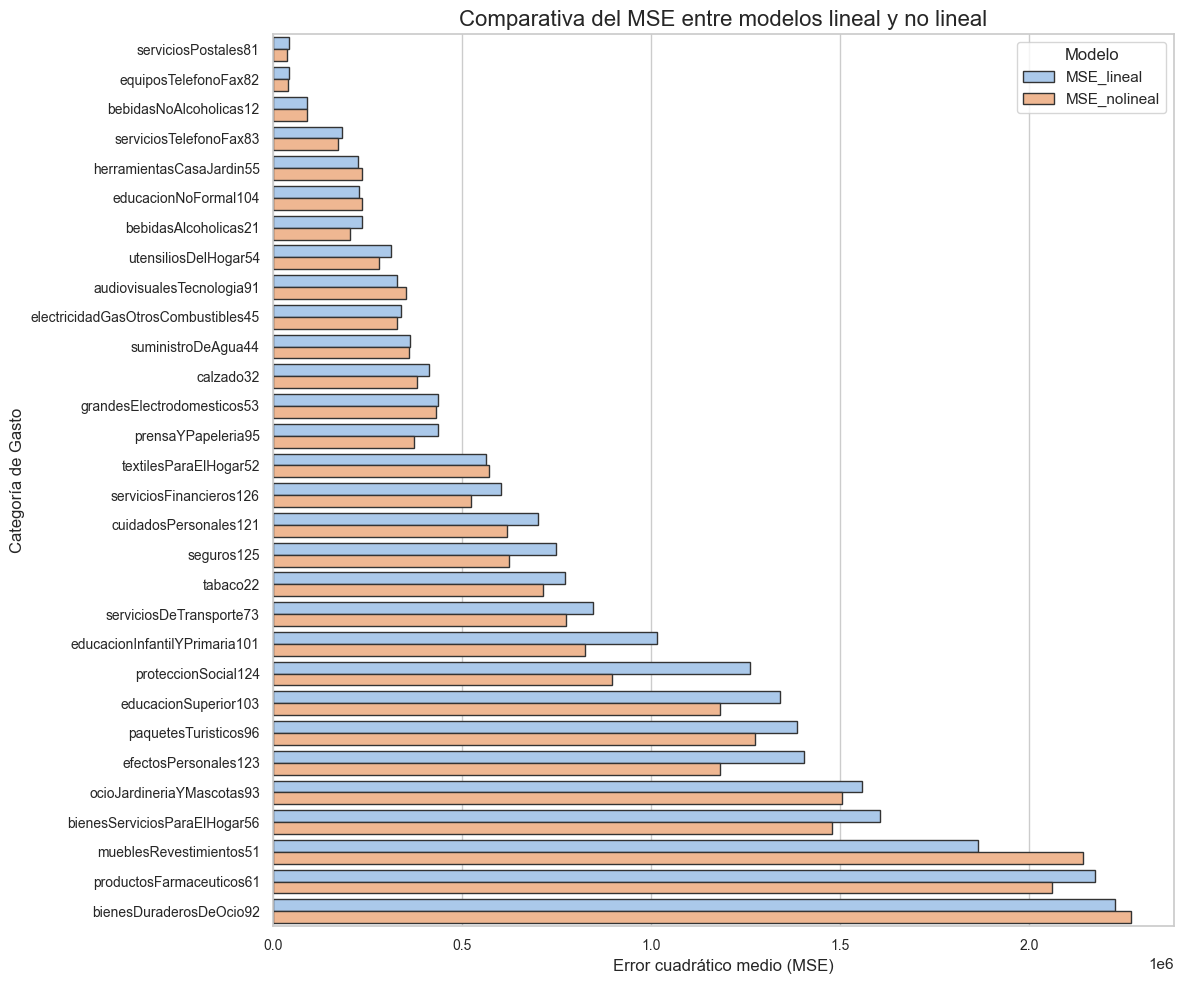

In [13]:
plot_mse_comparison(metrics_lineal_df, mse_no_lineal_df)

# Mapas de calor

In [45]:
importances_pivoted = nonlineal_importances_df.pivot(index='Variable', columns='Target', values='Importance').reset_index()

In [46]:
import pandas as pd

# Supongamos que tu DataFrame se llama lineal_coefs_df

# Diccionario original
codigos_comunidad = {
    "Andalucía": 1, "Aragón": 2, "Asturias": 3, "Islas Baleares": 4,
    "Canarias": 5, "Cantabria": 6, "Castilla y León": 8, "Castilla-La Mancha": 7,
    "Cataluña": 9, "Comunidad Valenciana": 10, "Extremadura": 11, "Galicia": 12,
    "Madrid": 13, "Murcia": 14, "Navarra": 15,
    "País Vasco": 16, "La Rioja": 17, "Ceuta": 18, "Melilla": 19
}

# Crear diccionario inverso
codigo_to_nombre = {
    f"ccaa_{v:02d}": f"ccaa{clave.replace(' ', '').replace('-', '')}"
    for clave, v in codigos_comunidad.items()
}

# Reemplazar en la columna Variable
lineal_coefs_df["Variable"] = (
    lineal_coefs_df["Variable"]
    .replace(codigo_to_nombre)
)

importances_pivoted['Variable'] = (
    importances_pivoted['Variable'].replace(codigo_to_nombre)
)

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_only_ccaa(df_original):
    """
    Dibuja un heatmap solo para las filas que representan CCAA.
    
    Args:
        df_original (pd.DataFrame): DataFrame en formato ancho
            con Variable como índice o columna.
    """
    df_copy = df_original.copy()

    # Si Variable es índice, pásalo a columna
    if df_copy.index.name == "Variable":
        df_copy = df_copy.reset_index()

    # Filtrar filas que empiezan por 'ccaa'
    df_ccaa = df_copy[df_copy["Variable"].str.startswith("ccaa")].copy()

    if df_ccaa.empty:
        print("⚠️ No hay filas que empiecen por 'ccaa'.")
        return

    # Melt para pasar de ancho a largo
    df_long = df_ccaa.melt(
        id_vars="Variable",
        var_name="Gasto",
        value_name="Coeficiente"
    )

    # Elimina filas NaN
    df_long = df_long.dropna(subset=["Coeficiente"])

    # Extraer código numérico de gasto
    df_long["Codigo"] = (
        df_long["Gasto"]
        .str.extract(r"(\d+)$")[0]
        .astype(int)
    )

    # Pivotar a matriz Variable x Codigo
    summary = df_long.pivot_table(
        index="Variable",
        columns="Codigo",
        values="Coeficiente",
        aggfunc="first"
    )

    # Ordenar columnas numéricamente
    cols = sorted(summary.columns)
    summary = summary[cols]

    # Normalizar cada columna [-1, 1]
    max_per_col = summary.abs().max(axis=0)
    summary_norm = summary.divide(max_per_col, axis=1)

    # Plot
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    fig, ax = plt.subplots(figsize=(20, len(summary) * 0.5))

    sns.heatmap(
        summary_norm,
        cmap=cmap,
        center=0,
        vmin=-1,
        vmax=1,
        linewidths=0.5,
        linecolor="grey",
        annot=summary.abs(),
        fmt=".2f",
        annot_kws={"size": 8},
        ax=ax,
        cbar_kws={"label": "Magnitud relativa\n(-1 a +1)"}
    )

    ax.set_title(
        "Coeficientes (|valor|) · Color = signo/magnitud relativa · Solo filas CCAA",
        fontsize=14, pad=20
    )
    ax.set_xlabel("Código de Categoría de Gasto", fontsize=12)
    ax.set_ylabel("CCAA", fontsize=12)
    ax.tick_params(axis='y', labelsize=13)
    ax.tick_params(axis='x', labelsize=13)
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()


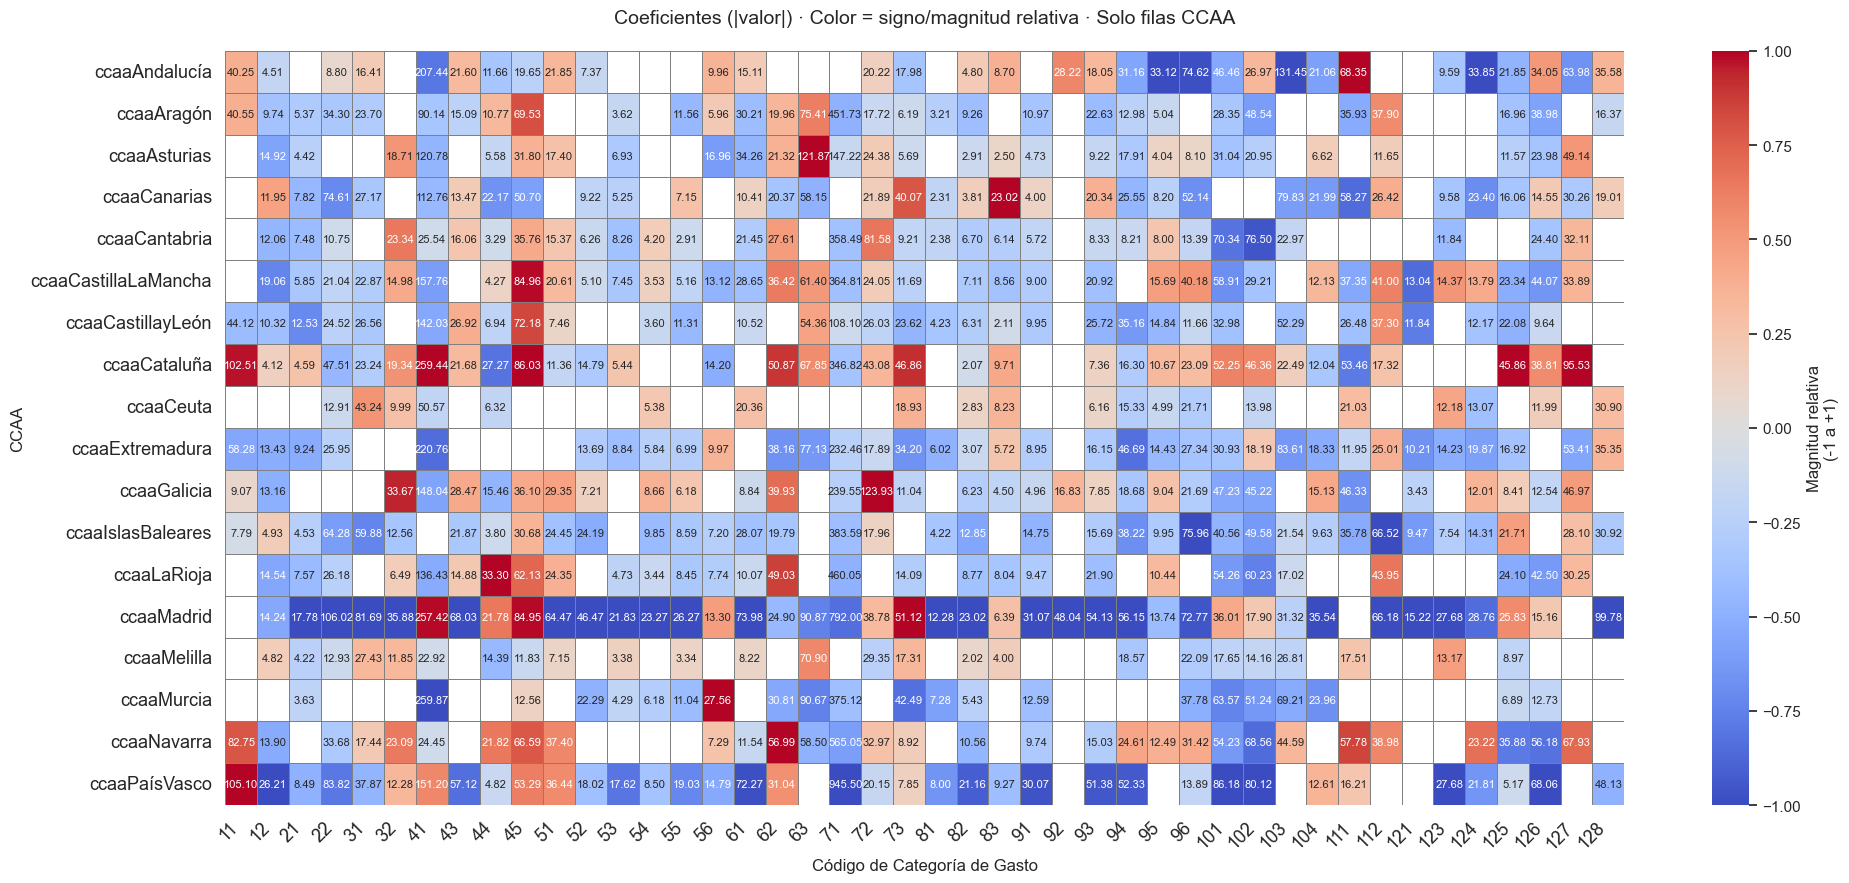

In [107]:
plot_heatmap_only_ccaa(lineal_coefs_df)

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_excluding_ccaa(df_original):
    """
    Dibuja un heatmap solo para las filas que NO son CCAA.
    
    Args:
        df_original (pd.DataFrame): DataFrame en formato ancho
            con Variable como índice o columna.
    """
    df_copy = df_original.copy()

    # Si Variable es índice, pásalo a columna
    if df_copy.index.name == "Variable":
        df_copy = df_copy.reset_index()

    # Filtrar filas que NO empiecen por 'ccaa'
    df_other = df_copy[~df_copy["Variable"].str.startswith("ccaa")].copy()

    if df_other.empty:
        print("⚠️ No hay filas distintas de las CCAA.")
        return

    # Melt para pasar de ancho a largo
    df_long = df_other.melt(
        id_vars="Variable",
        var_name="Gasto",
        value_name="Coeficiente"
    )

    # Elimina filas NaN
    df_long = df_long.dropna(subset=["Coeficiente"])

    # Extraer código numérico de gasto
    df_long["Codigo"] = (
        df_long["Gasto"]
        .str.extract(r"(\d+)$")[0]
        .astype(int)
    )

    # Pivotar a matriz Variable x Codigo
    summary = df_long.pivot_table(
        index="Variable",
        columns="Codigo",
        values="Coeficiente",
        aggfunc="first"
    )

    # Ordenar columnas numéricamente
    cols = sorted(summary.columns)
    summary = summary[cols]

    # Normalizar cada columna [-1, 1]
    max_per_col = summary.abs().max(axis=0)
    summary_norm = summary.divide(max_per_col, axis=1)

    # Plot
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    fig, ax = plt.subplots(figsize=(20, max(len(summary)*0.4, 4)))

    sns.heatmap(
        summary_norm,
        cmap=cmap,
        center=0,
        vmin=-1,
        vmax=1,
        linewidths=0.5,
        linecolor="grey",
        annot=summary.abs(),
        fmt=".2f",
        annot_kws={"size": 8},
        ax=ax,
        cbar_kws={"label": "Magnitud relativa\n(-1 a +1)"}
    )

    ax.set_title(
        "Coeficientes (|valor|) · Color = signo/magnitud relativa · Excluyendo filas CCAA",
        fontsize=14, pad=20
    )
    ax.set_xlabel("Código de Categoría de Gasto", fontsize=12)
    ax.set_ylabel("Variable", fontsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.tick_params(axis='x', labelsize=13)
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()


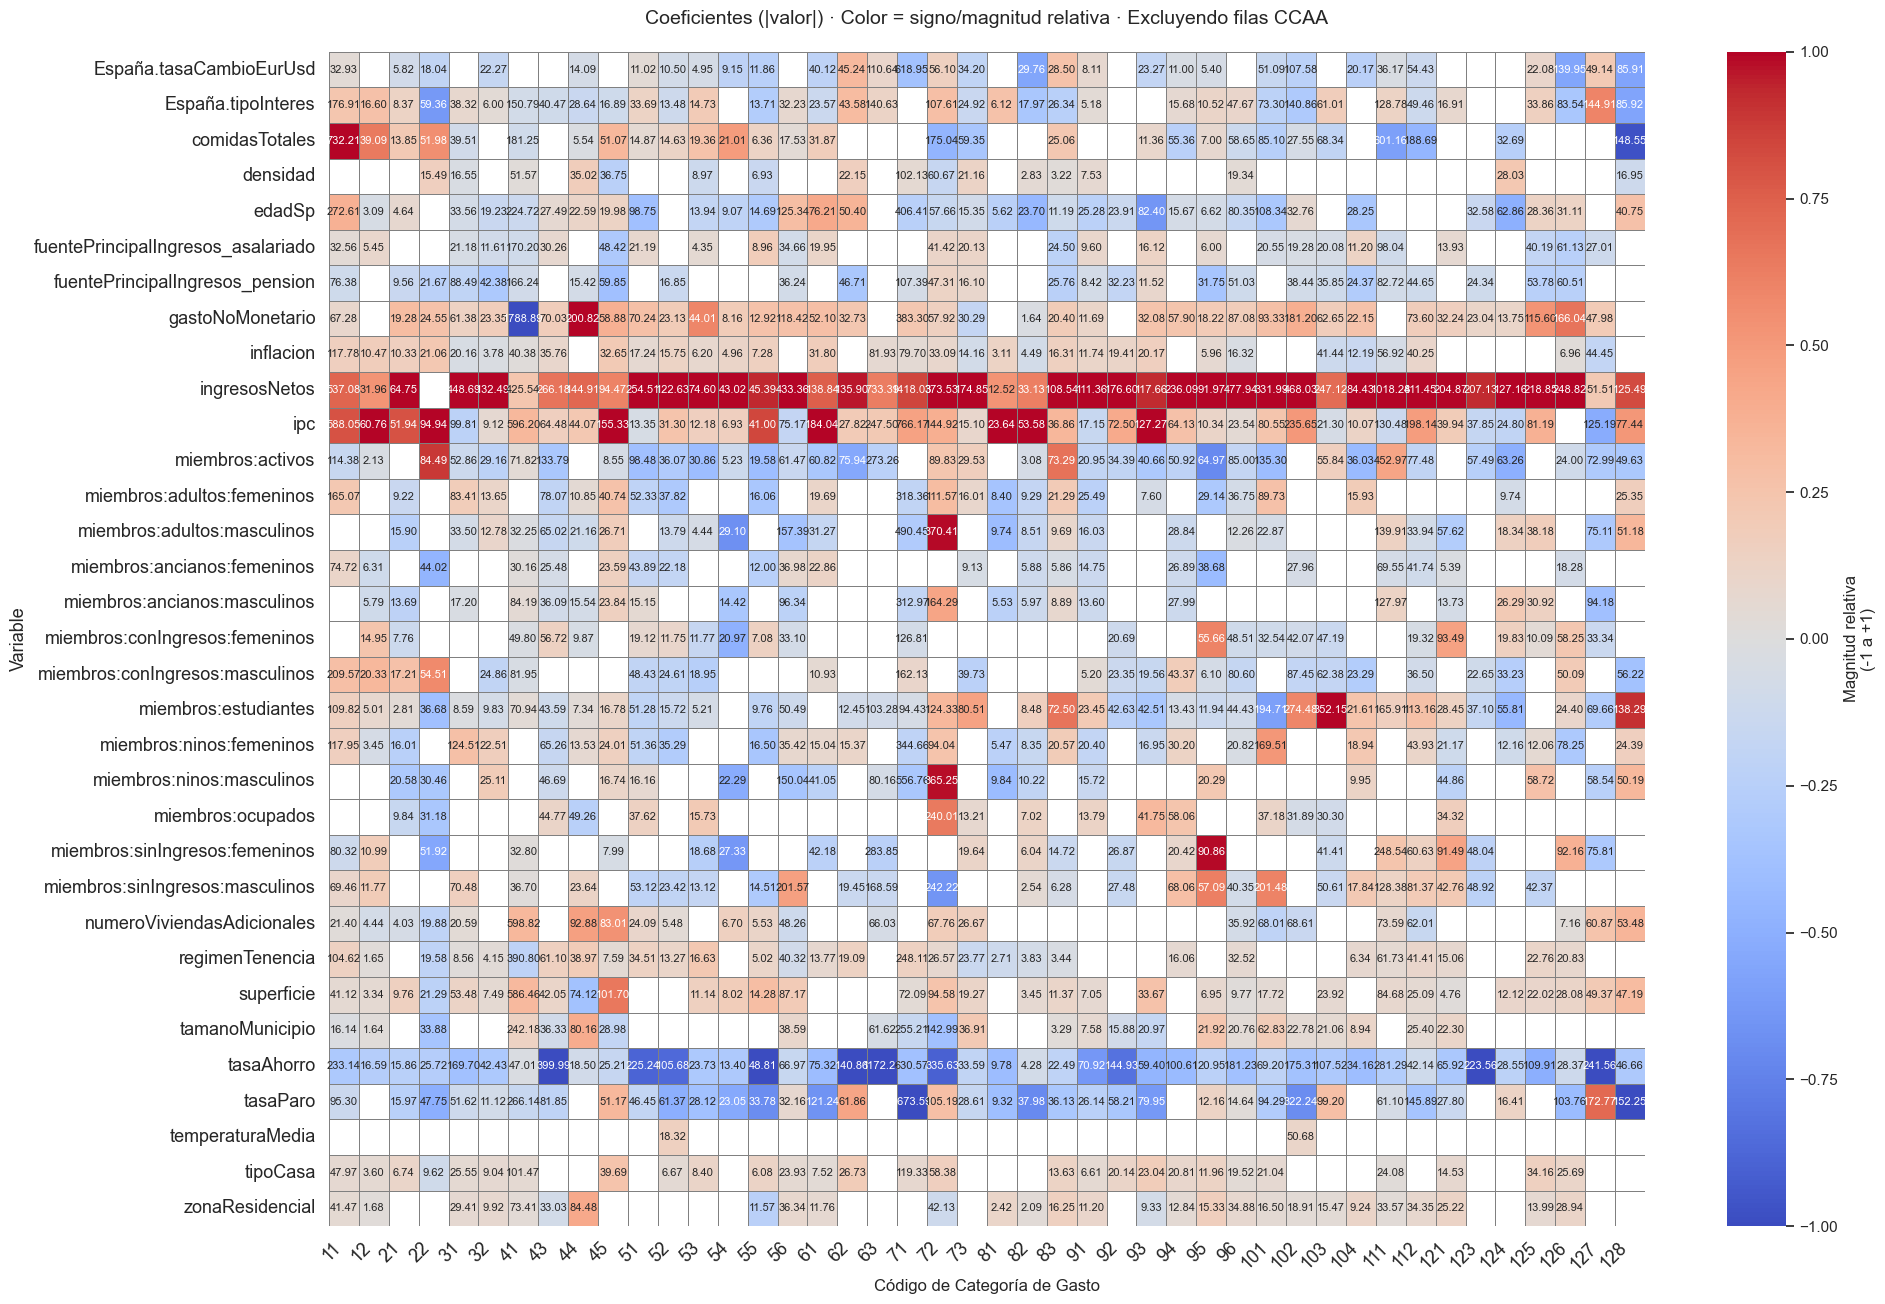

In [105]:
plot_heatmap_excluding_ccaa(lineal_coefs_df)

In [55]:
import re

def renombrar_columnas_por_codigo(df, ignore_cols=None):
    """
    Renombra las columnas extrayendo el código numérico de su final
    (p. ej. de 'gastoMonetario:alojamiento112' deja '112', etc.),
    pero omite renombrar cualquier columna cuyo nombre esté en ignore_cols.
    
    Parámetros:
    - df: DataFrame de pandas.
    - ignore_cols: lista de nombres de columnas a excluir (por defecto ['variable']).
    """
    if ignore_cols is None:
        ignore_cols = ['Variable']
        
    patron = re.compile(r'(\d+)$')  

    mapping = {}
    
    for col in df.columns:
        if col in ignore_cols:
            continue
        m = patron.search(col)
        if m:
            mapping[col] = m.group(1)
    
    return df.rename(columns=mapping)


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

def extract_code(col_name):
    match = re.search(r"(\d+)$", col_name)
    if match:
        return int(match.group(1))
    else:
        return float("inf")

def plot_heatmap_ccaa(df, vmax=10, figsize=(18, 8), output_path=None, scale_factor=1000):
    df_ccaa = df[df["Variable"].str.startswith("ccaa")]
    data = df_ccaa.drop(columns=["Target"], errors="ignore")
    data = data.set_index("Variable")
    data = data.dropna(axis=1, how="all")

    # Ordenar columnas por código numérico
    sorted_cols = sorted(data.columns, key=extract_code)
    data = data[sorted_cols]

    # Renombrar columnas a solo el número
    new_cols = [str(extract_code(col)) for col in data.columns]
    data.columns = new_cols

    # Escalar datos
    data_scaled = data * scale_factor

    plt.figure(figsize=figsize)
    sns.heatmap(
        data_scaled,
        cmap="OrRd",
        annot=True,
        fmt=".2f",
        annot_kws={"size": 9},
        linewidths=0.5,
        linecolor="grey",
        vmin=0,
        vmax=vmax,
        cbar_kws={"label": f"Importancia relativa ×{scale_factor}"}
    )
    plt.title("Mapa de calor de Importancias - Solo CCAA", fontsize=14)
    plt.xlabel("Código de Categoría de Gasto")
    plt.ylabel("CCAA")
    plt.xticks(rotation=90, fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()


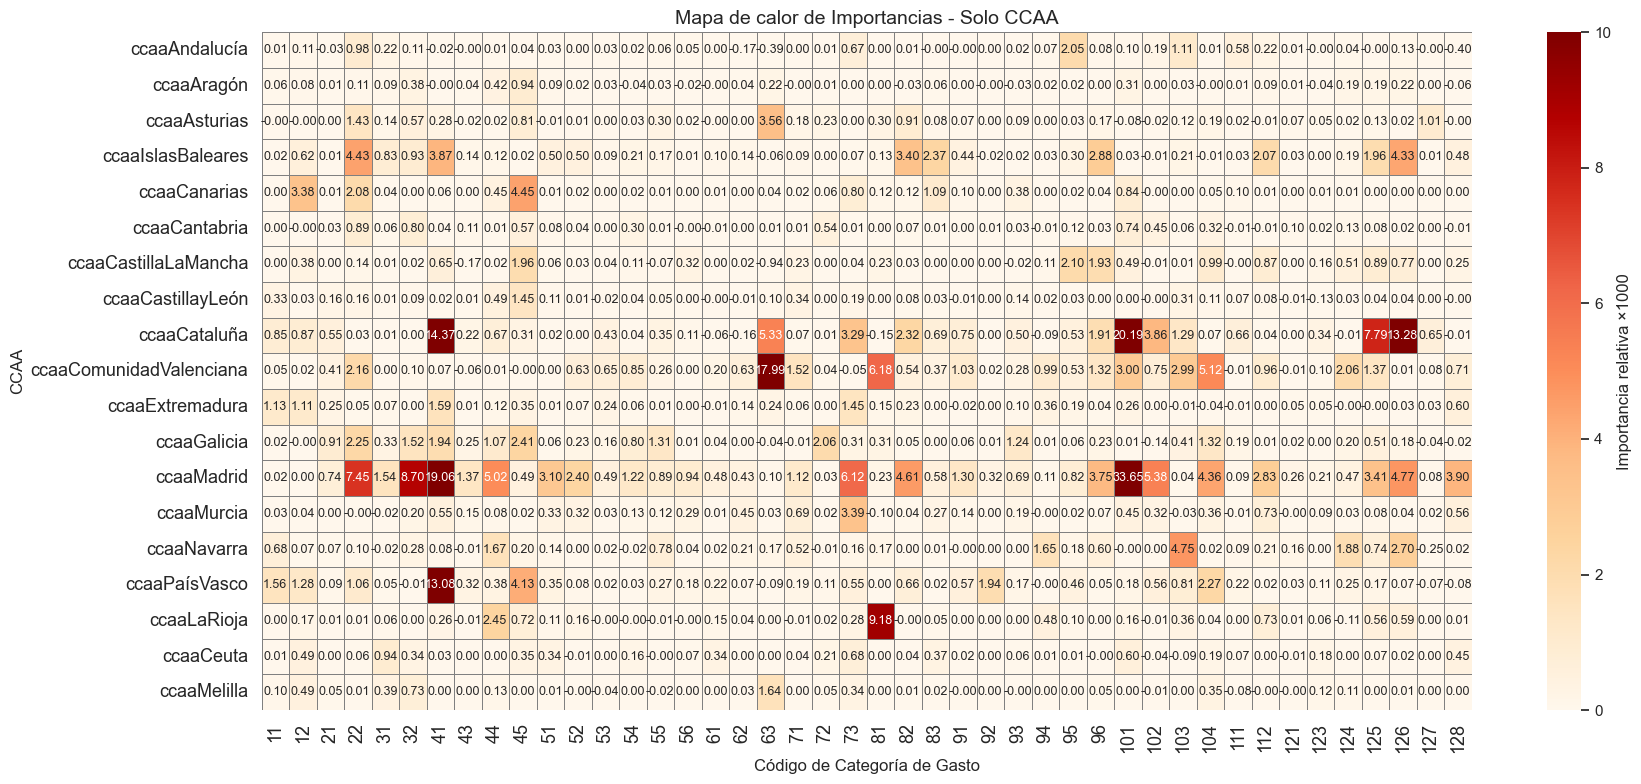

In [103]:
plot_heatmap_ccaa(importances_pivoted)

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

def extract_code(col_name):
    """Extrae el número final de un nombre de columna (p.e. gastoMonetario:xxxx)."""
    match = re.search(r"(\d+)$", col_name)
    if match:
        return int(match.group(1))
    else:
        return float("inf")

def format_value(val):
    """
    Devuelve una cadena formateada:
    - Si val >= 0.01 → 3 decimales fijos (p.e. 0.123)
    - Si val < 0.01 → notación científica con 2 decimales (p.e. 1.23e-03)
    """
    if abs(val) >= 0.01:
        return f"{val:.3f}"
    elif abs(val) > 0:
        return f"{val:.2e}"
    else:
        return "0"

def plot_heatmap_sin_ccaa(df, vmax=10, figsize=(20,12), output_path=None, scale_factor=1000):
    """
    Genera un heatmap excluyendo las filas ccaaXXX.
    """
    # Filtrar filas que NO empiezan por "ccaa"
    df_no_ccaa = df[~df["Variable"].str.startswith("ccaa")]
    
    # Eliminar columnas no numéricas
    data = df_no_ccaa.drop(columns=["Target"], errors="ignore")
    data = data.set_index("Variable")

    # Quitar columnas completamente NaN
    data = data.dropna(axis=1, how="all")

    # Ordenar columnas por código numérico
    sorted_cols = sorted(data.columns, key=extract_code)
    data = data[sorted_cols]

    # Renombrar columnas a solo el número del código
    new_cols = [str(extract_code(col)) for col in data.columns]
    data.columns = new_cols

    # Escalar datos
    data_scaled = data * scale_factor

    # Aplicar formato dinámico a cada valor para mostrarlo como string
    data_str = data_scaled.applymap(format_value)

    plt.figure(figsize=figsize)
    sns.heatmap(
        data_scaled,
        cmap="OrRd",
        annot=data_str,
        fmt="",
        annot_kws={"size": 7},       # tamaño ajustado
        linewidths=0.5,
        linecolor="grey",
        vmin=0,
        vmax=vmax,
        cbar_kws={"label": f"Importancia relativa ×{scale_factor}"}
    )
    plt.title("Mapa de calor de Importancias - Sin CCAA", fontsize=14)
    plt.xlabel("Código de Categoría de Gasto")
    plt.ylabel("Variable")
    plt.xticks(rotation=90, fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()


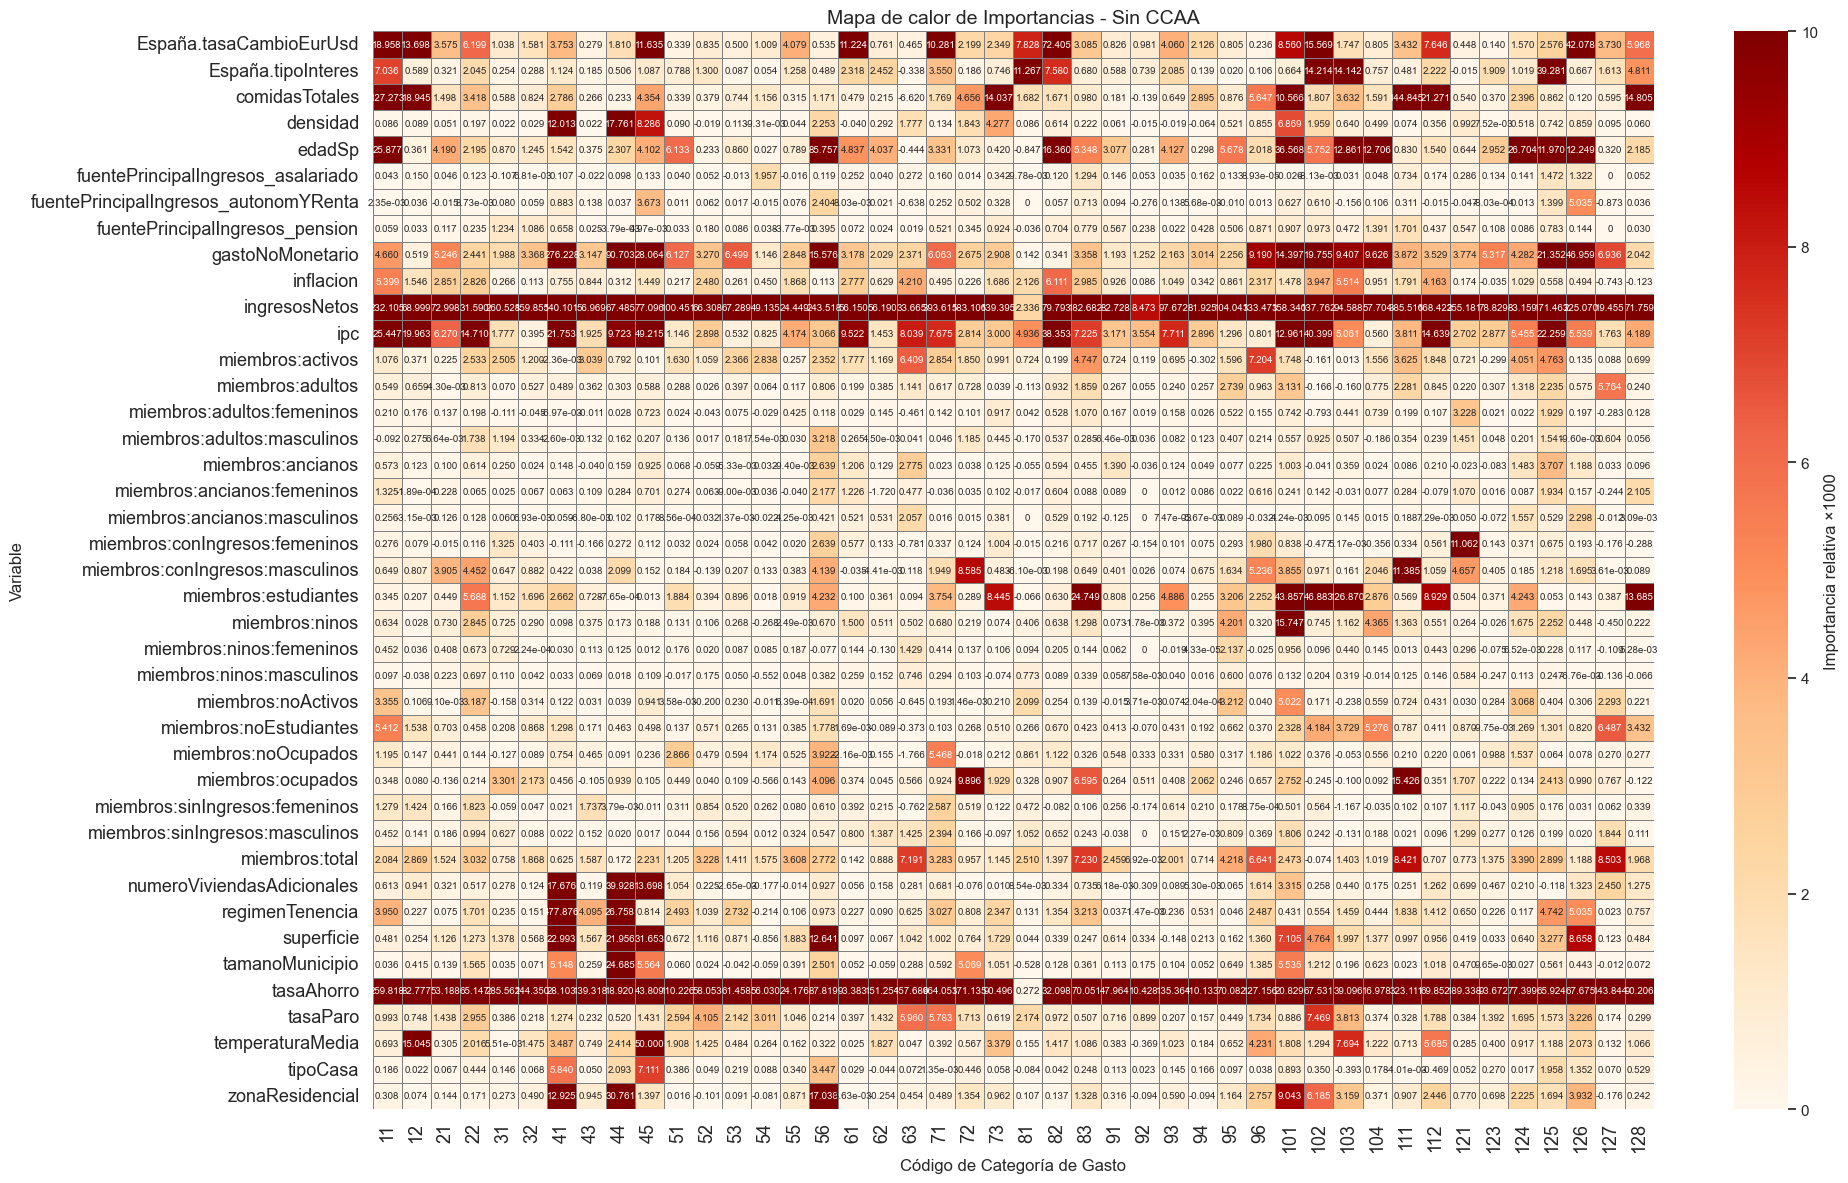

In [101]:
plot_heatmap_sin_ccaa(importances_pivoted)